## Importing Libs

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
from bs4 import BeautifulSoup
import json
from pprint import pprint
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
import highlight_text
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from mplsoccer import Pitch, VerticalPitch
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
from mplsoccer import PyPizza, add_image, FontManager
from matplotlib.patches import Rectangle
import matplotlib.font_manager as font_manager
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
from mplsoccer import PyPizza, add_image, FontManager
#import soccerdata as sd
import re
from unidecode import unidecode
from scipy.spatial import ConvexHull
from matplotlib.colors import LinearSegmentedColormap
from highlight_text import ax_text, fig_text


from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import main
import visuals
import seaborn as sns
import requests
import utils
import os
%load_ext autoreload
%autoreload 2

pd.set_option("display.max_rows", None, "display.max_columns", None)
background = "black"
text_color = 'black'
primary = '#C8102E'
secondary = 'lightblue'
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import matplotlib.font_manager as fm
from mplsoccer import FontManager

# Set the path to the locally downloaded font file
font_path = r'C:\Users\acer\Documents\GitHub\IndianCitizen\ScorePredict\Score Logos-20241022T100701Z-001\Score Logos\Sora_Font\Sora-Regular.ttf'

# Add the font to matplotlib
font_prop = fm.FontProperties(fname=font_path)

# You can now use this font in your plots
fm_sora = FontManager()
#fm_sora.prop = font_prop

print("Font loaded and registered successfully!")

Font loaded and registered successfully!


In [34]:
from sqlalchemy import create_engine
import psycopg2

# Database connection settings (replace with your credentials)
db_config = {
    'dbname': 'understat_shots_db',
    'user': 'ichadha',
    'password': 'ichadhapg',
    'host': 'localhost',
    'port': 5432,
}

# Create a connection engine
engine = create_engine(f"postgresql+psycopg2://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['dbname']}")

## Shot of the Week

### Creating DataFrame

### Top 5 Leagues

In [7]:
goal_low_xg = """select round("xG" :: numeric ,4) xg,"result",player,situation,h_team,a_team,league,h_a,"minute",date,player_assisted,"lastAction","X","Y"
from understat_shots_tb
where "date" > current_date - 7
and "result" = 'Goal' and "xG" > 0
order by "xG" 
limit 1;"""

with engine.connect() as conn:
    df_goal_low_xg = pd.read_sql(goal_low_xg, conn)

In [8]:
df_goal_low_xg

xg result              player situation            h_team  \
0  0.0147   Goal  Callum Hudson-Odoi  OpenPlay  Newcastle United   

              a_team league h_a  minute                date player_assisted  \
0  Nottingham Forest    EPL   a       5 2025-02-23 14:00:00            None   

     lastAction      X      Y  
0  BallRecovery  0.717  0.551

In [9]:
df_goal_low_xg['xGOT'] = 0.35
#df_goal_low_xg['score'] = '5:1'
#df_goal_low_xg['venueName'] = 'Thomas Léonard'
#df_goal_low_xg['second']

In [10]:
if __name__ == "__main__":
    driver = webdriver.Chrome()
    
# whoscored match centre url of the required match (Example: Barcelona vs Sevilla)
url = "https://1xbet.whoscored.com/matches/1821400/live/england-premier-league-2024-2025-newcastle-nottingham-forest"
match_data = main.getMatchData(driver, url, close_window=True)

# Match dataframe containing info about the match
matches_df = main.createMatchesDF(match_data)

# Events dataframe      
events_df = main.createEventsDF(match_data)

# match Id
matchId = match_data['matchId']

# Information about respective teams as dictionary
home_data = matches_df['home'][matchId]
away_data = matches_df['away'][matchId]

Region: England, League: Premier League, Season: 2024/2025, Match Id: 1821400


In [11]:
events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == 'Callum Hudson-Odoi')]

id  eventId  minute  second  teamId h_a     x     y  \
99  2.780118e+09       36       5    42.0     174   a  74.1  56.4   

    expandedMinute     period  type outcomeType  \
99               5  FirstHalf  Goal  Successful   

                                           qualifiers  \
99  [{'type': 'OutOfBoxCentre'}, {'type': 'Regular...   

                                 satisfiedEventsTypes  isTouch  matchId  \
99  [touches, goalNormal, shotOnTarget, shotsTotal...     True  1821400   

              startDate            startTime  score ftScore htScore etScore  \
99  2025-02-23T00:00:00  2025-02-23T14:00:00  4 : 3   4 : 3   4 : 1           

          venueName  maxMinute playerId          playerName  endX  endY  \
99  St. James' Park         94   350088  Callum Hudson-Odoi   NaN   NaN   

    goalMouthZ  goalMouthY  isGoal  isShot  blockedX  blockedY  \
99         5.1        54.2    True    True       NaN       NaN   

    relatedEventId  relatedPlayerId cardType shotBodyType situation  \
99             NaN              NaN    False    RightFoot  OpenPlay   

    shotSixYardBox  shotPenaltyArea  shotOboxTotal  shotOpenPlay  shotCounter  \
99           False            False           True          True        False   

    shotSetPiece  shotDirectCorner  shotOffTarget  shotOnPost  shotOnTarget  \
99         False             False          False       False          True   

    shotsTotal  shotBlocked  shotRightFoot  shotLeftFoot  shotHead  shotObp  \
99        True        False           True         False     False    False   

    goalSixYardBox  goalPenaltyArea  goalObox  goalOpenPlay  goalCounter  \
99           False            False      True          True        False   

    goalSetPiece  penaltyScored  goalOwn  goalNormal  goalRightFoot  \
99         False          False    False        True           True   

    goalLeftFoot  goalHead  goalObp  shortPassInaccurate  shortPassAccurate  \
99         False     False    False                False              False   

    passCorner  passCornerAccurate  passCornerInaccurate  passFreekick  \
99       False               False                 False         False   

    passBack  passForward  passLeft  passRight  keyPassLong  keyPassShort  \
99     False        False     False      False        False         False   

    keyPassCross  keyPassCorner  keyPassThroughball  keyPassFreekick  \
99         False          False               False            False   

    keyPassThrowin  keyPassOther  assistCross  assistCorner  \
99           False         False        False         False   

    assistThroughball  assistFreekick  assistThrowin  assistOther  \
99              False           False          False        False   

    dribbleLost  dribbleWon  challengeLost  interceptionWon  clearanceHead  \
99        False       False          False            False          False   

    outfielderBlock  passCrossBlockedDefensive  outfielderBlockedPass  \
99            False                      False                  False   

    offsideGiven  offsideProvoked  foulGiven  foulCommitted  yellowCard  \
99         False            False      False          False       False   

    voidYellowCard  secondYellow  redCard  turnover  dispossessed  \
99           False         False    False     False         False   

    saveLowLeft  saveHighLeft  saveLowCentre  saveHighCentre  saveLowRight  \
99        False         False          False           False         False   

    saveHighRight  saveHands  saveFeet  saveObp  saveSixYardBox  \
99          False      False     False    False           False   

    savePenaltyArea  saveObox  keeperDivingSave  standingSave  closeMissHigh  \
99            False     False             False         False          False   

    closeMissHighLeft  closeMissHighRight  closeMissLeft  closeMissRight  \
99              False               False          False           False   

    shotOffTargetInsideBox  touches  assist  ballRecovery  clearanceE

In [12]:
player = 'Callum Hudson-Odoi'
df_goal_low_xg['goalMouthZ'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == player)]['goalMouthZ'].iloc[0]
df_goal_low_xg['goalMouthY'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == player)]['goalMouthY'].iloc[0]
df_goal_low_xg['second'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == player)]['second'].iloc[0]
df_goal_low_xg['score'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == player)]['score'].iloc[0]
df_goal_low_xg['venueName'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == player)]['venueName'].iloc[0]

### UCL

In [3]:
import requests
import pandas as pd

# Define the range of match IDs
match_ids = [12763958, 12764006, 12764059,12764152,12764084,12764222,
            12764241,12764271,12764277,12764296,12764332,12764399,
            12764448,12764504,12764494,12764165,12764517,12764530]  # Replace with your match ID range

# Initialize an empty list to store shot data
all_shots = []

# Loop through each match ID
for match_id in match_ids:
    url = f'https://www.sofascore.com/api/v1/event/{match_id}/shotmap'
    
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an HTTPError for bad responses
        
        data = response.json()
        
        # Check if 'shotmap' exists and is a list
        if 'shotmap' in data and isinstance(data['shotmap'], list):
            shotmap_data = data['shotmap']
            
            # Normalize and add match ID for reference
            df = pd.json_normalize(shotmap_data, sep='_')
            df['matchId'] = match_id  # Add match ID as a column
            
            all_shots.append(df)  # Store DataFrame in list

    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for match {match_id}: {e}")

# Combine all match data into a single DataFrame
if all_shots:
    final_df = pd.concat(all_shots, ignore_index=True)
else:
    final_df = pd.DataFrame()  # Empty DataFrame if no data found

In [6]:
df = final_df.drop(columns = ['draw_start_x', 'draw_start_y', 'draw_end_x',
       'draw_end_y', 'draw_goal_x', 'draw_goal_y', 'blockCoordinates_x',
       'blockCoordinates_y', 'blockCoordinates_z', 'draw_block_x',
       'draw_block_y', 'player_fieldTranslations_nameTranslation_ar',
       'player_fieldTranslations_nameTranslation_hi',
       'player_fieldTranslations_nameTranslation_bn',
       'player_fieldTranslations_shortNameTranslation_ar',
       'player_fieldTranslations_shortNameTranslation_hi',
       'player_fieldTranslations_shortNameTranslation_bn'],axis=1)

In [15]:
df[df['shotType'] == 'goal'].sort_values(by='xg', ascending=True).head(1)

isHome shotType goalType situation   bodyPart goalMouthLocation  \
268    True     goal  regular    corner  left-foot         low-right   

           xg      xgot       id  time  addedTime  timeSeconds  \
268  0.019988  0.295599  4347641    52        NaN         3362   

     reversedPeriodTime  reversedPeriodTimeSeconds incidentType  player_name  \
268                  34                       2038         shot  Angel Gomes   

    player_firstName player_lastName  player_slug player_shortName  \
268              NaN             NaN  angel-gomes         A. Gomes   

    player_position player_jerseyNumber  player_userCount  player_id  \
268               M                   8              2938     867441   

     playerCoordinates_x  playerCoordinates_y  playerCoordinates_z  \
268             2.416488            18.082825                    0   

     goalMouthCoordinates_x  goalMouthCoordinates_y  goalMouthCoordinates_z  \
268                       0               44.760042                    12.7   

      matchId  
268  12764296

In [17]:
if __name__ == "__main__":
    driver = webdriver.Chrome()
    
# whoscored match centre url of the required match (Example: Barcelona vs Sevilla)
url = "https://1xbet.whoscored.com/matches/1866206/live/europe-champions-league-2024-2025-lille-feyenoord"
match_data = main.getMatchData(driver, url, close_window=True)

# Match dataframe containing info about the match
matches_df = main.createMatchesDF(match_data)

# Events dataframe      
events_df = main.createEventsDF(match_data)

# match Id
matchId = match_data['matchId']

# Information about respective teams as dictionary
home_data = matches_df['home'][matchId]
away_data = matches_df['away'][matchId]

Region: Europe, League: Champions League, Season: 2024/2025, Match Id: 1866206


In [18]:
events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == 'Angel Gomes')]

id  eventId  minute  second  teamId h_a     x     y  \
865  2.770264e+09      906      56     2.0     607   h  96.4  68.7   

     expandedMinute      period  type outcomeType  \
865              63  SecondHalf  Goal  Successful   

                                            qualifiers  \
865  [{'type': 'FromCorner'}, {'type': 'LeftFoot'},...   

                                  satisfiedEventsTypes  isTouch  matchId  \
865  [touches, goalNormal, shotOnTarget, shotsTotal...     True  1866206   

               startDate            startTime  score ftScore htScore etScore  \
865  2025-01-29T00:00:00  2025-01-29T20:00:00  6 : 1   6 : 1   2 : 1           

                                 venueName  maxMinute playerId   playerName  \
865  Decathlon Arena - Stade Pierre-Mauroy         93   338497  Angel Gomes   

     endX  endY  relatedEventId  relatedPlayerId  goalMouthZ  goalMouthY  \
865   NaN   NaN           576.0         352830.0        12.7        45.8   

     isShot  isGoal  blockedX  blockedY isOwnGoal cardType shotBodyType  \
865    True    True       NaN       NaN       NaN    False     LeftFoot   

      situation  shotSixYardBox  shotPenaltyArea  shotOboxTotal  shotOpenPlay  \
865  FromCorner           False             True          False         False   

     shotCounter  shotSetPiece  shotDirectCorner  shotOffTarget  shotOnPost  \
865        False          True             False          False       False   

     shotOnTarget  shotsTotal  shotBlocked  shotRightFoot  shotLeftFoot  \
865          True        True        False          False          True   

     shotHead  shotObp  goalSixYardBox  goalPenaltyArea  goalObox  \
865     False    False           False             True     False   

     goalOpenPlay  goalCounter  goalSetPiece  penaltyScored  goalOwn  \
865         False        False          True          False    False   

     goalNormal  goalRightFoot  goalLeftFoot  goalHead  goalObp  \
865        True          False          True     False    False   

     shortPassInaccurate  shortPassAccurate  passCorner  passCornerAccurate  \
865                False              False       False               False   

     passCornerInaccurate  passFreekick  passBack  passForward  passLeft  \
865                 False         False     False        False     False   

     passRight  keyPassLong  keyPassShort  keyPassCross  keyPassCorner  \
865      False        False         False         False          False   

     keyPassThroughball  keyPassFreekick  keyPassThrowin  keyPassOther  \
865               False            False           False         False   

     assistCross  assistCorner  assistThroughball  assistFreekick  \
865        False         False              False           False   

     assistThrowin  assistOther  dribbleLost  dribbleWon  challengeLost  \
865          False        False        False       False          False   

     interceptionWon  clearanceHead  outfielderBlock  \
865            False          False            False   

     passCrossBlockedDefensive  outfielderBlockedPass  offsideGiven  \
865                      False                  False         False   

     offsideProvoked  foulGiven  foulCommitted  yellowCard  voidYellowCard  \
865            False      False          False       False           False   

     secondYellow  redCard  turnover  dispossessed  saveLowLeft  saveHighLeft  \
865         False    False     False         False        False         False   

     saveLowCentre  saveHighCentre  saveLowRight  saveHighRight  saveHands  \
865          False           False         False          False      False   

     saveFeet  saveObp  saveSixYardBox  savePenaltyArea  saveObox  \
865     False    False           False            False     False   

     keeperDivingSave  standingSave  closeMissHigh  closeMissHighLeft  \
865             False         False          False              False   

     closeMissHighRight  closeMissLeft  closeMissRight  \
865 

In [31]:
player = 'Angel Gomes'
df_goal_low_xg = df[df['shotType'] == 'goal'].sort_values(by='xg', ascending=True).head(1)
#df_goal_low_xg['goalMouthZ'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == player)]['goalMouthZ'].iloc[0]
#df_goal_low_xg['goalMouthY'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == player)]['goalMouthY'].iloc[0]
df_goal_low_xg['second'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == player)]['second'].iloc[0]
df_goal_low_xg['score'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == player)]['score'].iloc[0]
df_goal_low_xg['venueName'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == player)]['venueName'].iloc[0]
df_goal_low_xg['date'] = events_df[(events_df['type'] == 'Goal') & (events_df['playerName'] == player)]['startDate'].iloc[0]
df_goal_low_xg['date'] = df_goal_low_xg['date'].str.split('T').str[0]

In [20]:
df_goal_low_xg.columns

Index(['isHome', 'shotType', 'goalType', 'situation', 'bodyPart',
       'goalMouthLocation', 'xg', 'xgot', 'id', 'time', 'addedTime',
       'timeSeconds', 'reversedPeriodTime', 'reversedPeriodTimeSeconds',
       'incidentType', 'player_name', 'player_firstName', 'player_lastName',
       'player_slug', 'player_shortName', 'player_position',
       'player_jerseyNumber', 'player_userCount', 'player_id',
       'playerCoordinates_x', 'playerCoordinates_y', 'playerCoordinates_z',
       'goalMouthCoordinates_x', 'goalMouthCoordinates_y',
       'goalMouthCoordinates_z', 'matchId', 'second', 'score', 'venueName'],
      dtype='object')

### Plotting

In [13]:
df_goal_low_xg

xg result              player situation            h_team  \
0  0.0147   Goal  Callum Hudson-Odoi  OpenPlay  Newcastle United   

              a_team league h_a  minute                date player_assisted  \
0  Nottingham Forest    EPL   a       5 2025-02-23 14:00:00            None   

     lastAction      X      Y  xGOT  goalMouthZ  goalMouthY  second  score  \
0  BallRecovery  0.717  0.551  0.35         5.1        54.2    42.0  4 : 3   

         venueName  
0  St. James' Park

In [11]:
df_goal_low_xg['date'].iloc[0].date()

datetime.date(2025, 2, 15)

In [45]:
df_goal_low_xg['X'] = 100 - df_goal_low_xg['playerCoordinates_x']
df_goal_low_xg['Y'] = 100 - df_goal_low_xg['playerCoordinates_y']
df_goal_low_xg['h_team'] = 'Lille'
df_goal_low_xg['a_team'] = 'Feyenoord'
df_goal_low_xg['league'] = 'UCL'
df_goal_low_xg['minute'] = df_goal_low_xg['time']
df_goal_low_xg['player'] = df_goal_low_xg['player_name']
df_goal_low_xg['player_assisted'] = 'None'
df_goal_low_xg['lastAction'] = 'Pass'

In [20]:
def plot_goal_low_xg(df):
    teamcolor = '#C8102E'
    #background = 'green'
    df['X'] = (df['X'] / 100) * 105 * 100
    df['Y'] = (df['Y'] / 100) * 68 * 100
    
    pitch = VerticalPitch(
    pitch_type='uefa',
    goal_type = 'box',
    half=True, 
    pitch_color=background, 
    stripe=False,
    pad_bottom=.5, 
    line_color='white',
    linewidth=.5,
    axis=True, 
    label=True
    )

    # create a subplot with 2 rows and 1 column
    fig = plt.figure(figsize=(9, 12))
    fig.patch.set_facecolor(background)

    ax1 = fig.add_axes([0, 0.7, 1, .2])
    ax1.set_facecolor(background)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)

    ax1.text(
        x=0.29, 
        y=.9, 
        s='Shot Of The Week', 
        fontsize=28, 
        fontproperties=font_prop,  
        color='white', 
        ha='center'
    )

    ax1.text(
        x=0.39, 
        y=0.6, 
        s=f"Match - {df['h_team'].iloc[0]} v {df['a_team'].iloc[0]} ({df['league'].iloc[0]})", 
        fontsize=15, 
        fontproperties=font_prop, 
        color='white',
        ha='center'
    )

    ax1.text(
        x=0.21, 
        y=0.4, 
        s=f"Date - {df['date'].iloc[0].date()}",
        #s=f"Date - {df['date'].iloc[0]}", 
        fontsize=15, 
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )
    
    ax1.text(
        x=0.815, 
        y=.6, 
        s=f"Time - {df['minute'].iloc[0]} : {df['second'].iloc[0]}", 
        fontsize=15,
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )

    ax1.text(
        x=0.28, 
        y=.2, 
        s=f"Player - {df['player'].iloc[0]} ({df['h_a'].iloc[0]})", 
        fontsize=15,
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='center'
    )

    ax1.text(
        x=0.8, 
        y=.4, 
        s=f"Final Score - {df['score'].iloc[0]}", 
        fontsize=15,
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )

    logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

    ax_image = add_image(
        logo, fig, left=0.82, bottom=0.85, width=0.08, height=0.08,aspect='equal'
    )
    

    ax1.set_axis_off()

    
    ax2 = fig.add_axes([.05, 0.25, .9, .5])
    ax2.set_facecolor(background)
    
    pitch.draw(ax=ax2)

    pitch.scatter(
        df['X'].iloc[0], 
        df['Y'].iloc[0], 
        s=40000 * df['xg'].iloc[0], 
        c=background,
        marker='football',
        ax=ax2,
        alpha=.7,
        linewidths=.8,
        edgecolors=teamcolor
    )
    pitch.annotate(f"xG - {round(df['xg'].iloc[0],3)}",
        xy=(df['X'].iloc[0]-5,df['Y'].iloc[0]+7),
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='center', va='center',
        ax=ax2
    )
    pitch.annotate(f"xGOT - {round(df['xGOT'].iloc[0],3)}",
        xy=(df['X'].iloc[0]-8,df['Y'].iloc[0]+7),
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='center', va='center',
        ax=ax2
    )

    pitch.annotate(f"Situation - {df['situation'].iloc[0]}",
        xy=(df['X'].iloc[0]-11,df['Y'].iloc[0]+7),
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='center', va='center',
        ax=ax2
    )

    pitch.arrows(
        df['X'].iloc[0], df['Y'].iloc[0],105,35,
        width=1.5,alpha=0.8,zorder=3,
        headwidth=8, headlength=10, color='white',
        ax=ax2
    )

    

        
    ax2.set_axis_off()
    
    # add another axis for the stats
    ax3 = fig.add_axes([0, 0.2, 1, .05])
    ax3.set_facecolor(background)
    ax3.set_xlim(0, 1)
    ax3.set_ylim(0, 1)
    
    ax3.text(
        x=0.1, 
        y=0, 
        s=f"Assisted By : {df['player_assisted'].iloc[0]}", 
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='left'
    )

    ax3.text(
        x=0.6, 
        y=0, 
        s=f"Last Action : {df['lastAction'].iloc[0]}", 
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='left'
    )
    

    ax3.set_axis_off()

    plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/ShotOfTheWeek.png',dpi=500,bbox_inches = 'tight',facecolor=background)


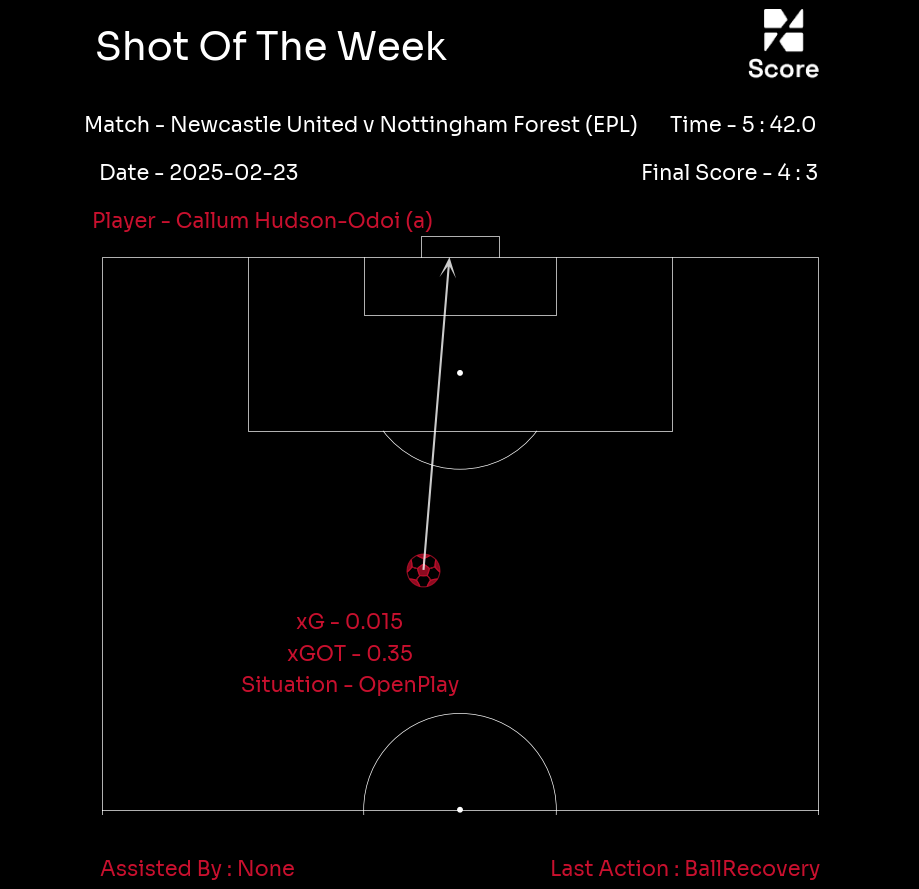

In [21]:
df_goal_low_xg1 = df_goal_low_xg.copy()
plot_goal_low_xg(df_goal_low_xg1)

## Miss of the Week

### Creating DataFrame

In [22]:
miss_high_xg = """select round("xG" :: numeric ,4) xg,"result",player,situation,h_team,a_team,league,h_a,"minute",date,player_assisted,"lastAction","X","Y"
from understat_shots_tb
where "date" > current_date - 7
and "result" != 'Goal' and situation != 'Penalty'
order by "xG" desc 
limit 1;"""

with engine.connect() as conn:
    df_miss_high_xg = pd.read_sql(miss_high_xg, conn)

In [32]:
#df_miss_high_xg = df[df['shotType'] != 'Goal'].sort_values(by='xg', ascending=False).head(1)

In [23]:
df_miss_high_xg

xg     result          player situation         h_team  \
0  0.9585  SavedShot  Maroan Sannadi  OpenPlay  Athletic Club   

            a_team   league h_a  minute                date player_assisted  \
0  Real Valladolid  La_Liga   h      19 2025-02-23 13:00:00            None   

  lastAction      X      Y  
0    Rebound  0.981  0.502

In [24]:
if __name__ == "__main__":
    driver = webdriver.Chrome()
    
# whoscored match centre url of the required match (Example: Barcelona vs Sevilla)
url = "https://1xbet.whoscored.com/matches/1821652/live/spain-laliga-2024-2025-athletic-club-real-valladolid"
match_data = main.getMatchData(driver, url, close_window=True)

# Match dataframe containing info about the match
matches_df = main.createMatchesDF(match_data)

# Events dataframe      
events_df = main.createEventsDF(match_data)

# match Id
matchId = match_data['matchId']

# Information about respective teams as dictionary
home_data = matches_df['home'][matchId]
away_data = matches_df['away'][matchId]

Region: Spain, League: LaLiga, Season: 2024/2025, Match Id: 1821652


In [25]:
events_df['type'].unique()

array(['Start', 'Pass', 'Dispossessed', 'Tackle', 'BlockedPass', 'Aerial',
       'Clearance', 'BallTouch', 'BallRecovery', 'MissedShots', 'TakeOn',
       'Foul', 'Challenge', 'KeeperPickup', 'Interception', 'Goal',
       'CornerAwarded', 'OffsideGiven', 'OffsidePass', 'OffsideProvoked',
       'SavedShot', 'Save', 'Claim', 'Card', 'End', 'SubstitutionOff',
       'SubstitutionOn', 'FormationChange', 'Smother', 'ShieldBallOpp',
       'ShotOnPost', 'FormationSet'], dtype=object)

In [26]:
player = df_miss_high_xg['player'].iloc[0]
minute = df_miss_high_xg['minute'].iloc[0]

#df_miss_high_xg['goalMouthZ'] = events_df[(events_df['type'] == 'SavedShot') & (events_df['playerName'] == player) & (events_df['minute'] == minute)]['goalMouthZ'].iloc[0]
#df_miss_high_xg['goalMouthY'] = events_df[(events_df['type'] == 'SavedShot') & (events_df['playerName'] == player) & (events_df['minute'] == minute)]['goalMouthY'].iloc[0]
df_miss_high_xg['second'] = events_df[(events_df['type'] == 'SavedShot') & (events_df['playerName'] == player)]['second'].iloc[0]
df_miss_high_xg['score'] = events_df[(events_df['type'] == 'SavedShot') & (events_df['playerName'] == player) ]['score'].iloc[0]
df_miss_high_xg['venueName'] =events_df[(events_df['type'] == 'SavedShot') & (events_df['playerName'] == player)]['venueName'].iloc[0]
df_miss_high_xg['date'] = events_df[(events_df['type'] == 'SavedShot') & (events_df['playerName'] == player)]['startDate'].iloc[0]
df_miss_high_xg['date'] = df_miss_high_xg['date'].str.split('T').str[0]

In [27]:
df_miss_high_xg

xg     result          player situation         h_team  \
0  0.9585  SavedShot  Maroan Sannadi  OpenPlay  Athletic Club   

            a_team   league h_a  minute        date player_assisted  \
0  Real Valladolid  La_Liga   h      19  2025-02-23            None   

  lastAction      X      Y  second  score  venueName  
0    Rebound  0.981  0.502    29.0  7 : 1  San Mamés

In [132]:
df_miss_high_xg['X'] = 100 - df_miss_high_xg['playerCoordinates_x']
df_miss_high_xg['Y'] = 100 - df_miss_high_xg['playerCoordinates_y']
df_miss_high_xg['h_team'] = 'Young Boys'
df_miss_high_xg['a_team'] = 'Crvena Zvezda'
df_miss_high_xg['league'] = 'UCL'
df_miss_high_xg['minute'] = df_miss_high_xg['time']
df_miss_high_xg['player'] = df_miss_high_xg['player_name']
df_miss_high_xg['player_assisted'] = 'None'
df_miss_high_xg['lastAction'] = 'Pass'
df_miss_high_xg['result'] = df_miss_high_xg['shotType']
df_miss_high_xg['situation'] = 'OpenPlay'

### Plotting

In [30]:
def plot_miss_high_xg(df):
    teamcolor = '#E2001A'
    #background = 'green'
    df['X'] = (df['X'] / 100) * 105 * 100
    df['Y'] = (df['Y'] / 100) * 68 * 100
    
    pitch = VerticalPitch(
    pitch_type='uefa',
    goal_type = 'box',
    half=True, 
    pitch_color=background, 
    stripe=False,
    pad_bottom=.5, 
    line_color='white',
    linewidth=.5,
    axis=True, 
    label=True
    )

    # create a subplot with 2 rows and 1 column
    fig = plt.figure(figsize=(9, 12))
    fig.patch.set_facecolor(background)

    ax1 = fig.add_axes([0, 0.7, 1, .2])
    ax1.set_facecolor(background)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)

    ax1.text(
        x=0.29, 
        y=.9, 
        s='Miss Of The Week', 
        fontsize=28, 
        fontproperties=font_prop,  
        color='white', 
        ha='center'
    )

    ax1.text(
        x=0.37, 
        y=0.6, 
        s=f"Match - {df['h_team'].iloc[0]} v {df['a_team'].iloc[0]} ({df['league'].iloc[0]})", 
        fontsize=15, 
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )
    
    ax1.text(
        x=0.815, 
        y=.6, 
        s=f"Time - {df['minute'].iloc[0]} : {df['second'].iloc[0]}", 
        fontsize=15,
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )

    ax1.text(
        x=0.21, 
        y=0.4, 
        s=f"Date - {df['date'].iloc[0]}", 
        fontsize=15, 
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )

    ax1.text(
        x=0.25, 
        y=.2, 
        s=f"Player - {df['player'].iloc[0]} ({df['h_a'].iloc[0]})", 
        fontsize=15,
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='center'
    )

    ax1.text(
        x=0.8, 
        y=.4, 
        s=f"Final Score - {df['score'].iloc[0]}", 
        fontsize=15,
        fontproperties=font_prop, 
        color='white', 
        ha='center'
    )

    logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

    ax_image = add_image(
        logo, fig, left=0.82, bottom=0.85, width=0.08, height=0.08,aspect='equal'
    )
    

    ax1.set_axis_off()

    
    ax2 = fig.add_axes([.05, 0.25, .9, .5])
    ax2.set_facecolor(background)
    
    pitch.draw(ax=ax2)

    pitch.scatter(
        df['X'].iloc[0], 
        df['Y'].iloc[0], 
        s=1000 * df['xg'].iloc[0], 
        color=teamcolor,
        marker='o',
        ax=ax2,
        alpha=.7,
        linewidths=.8,
        edgecolor='white'
    )
    pitch.annotate(f"xG - {round(df['xg'].iloc[0],2)}",
        xy=(df['X'].iloc[0]-21,df['Y'].iloc[0]+1),
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='center', va='center',
        ax=ax2
    )

    pitch.annotate(f"Situation - {df['situation'].iloc[0]}",
        xy=(df['X'].iloc[0]-24,df['Y'].iloc[0]+1),
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='center', va='center',
        ax=ax2
    )
    pitch.annotate(f"Result - {df['result'].iloc[0]}",
        xy=(df['X'].iloc[0]-27,df['Y'].iloc[0]+1),
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='center', va='center',
        ax=ax2
    )

    

        
    ax2.set_axis_off()
    
    # add another axis for the stats
    ax3 = fig.add_axes([0, 0.2, 1, .05])
    ax3.set_facecolor(background)
    ax3.set_xlim(0, 1)
    ax3.set_ylim(0, 1)

    ax3.text(
        x=0.1, 
        y=0, 
        s=f"Assisted By : {df['player_assisted'].iloc[0]}", 
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='left'
    )

    ax3.text(
        x=0.66, 
        y=0, 
        s=f"Last Action : {df['lastAction'].iloc[0]}", 
        fontsize=15, 
        fontproperties=font_prop, 
        color=teamcolor, 
        ha='left'
    )


    ax3.set_axis_off()
    plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/MissOfTheWeek.png',dpi=500,bbox_inches = 'tight',facecolor=background)

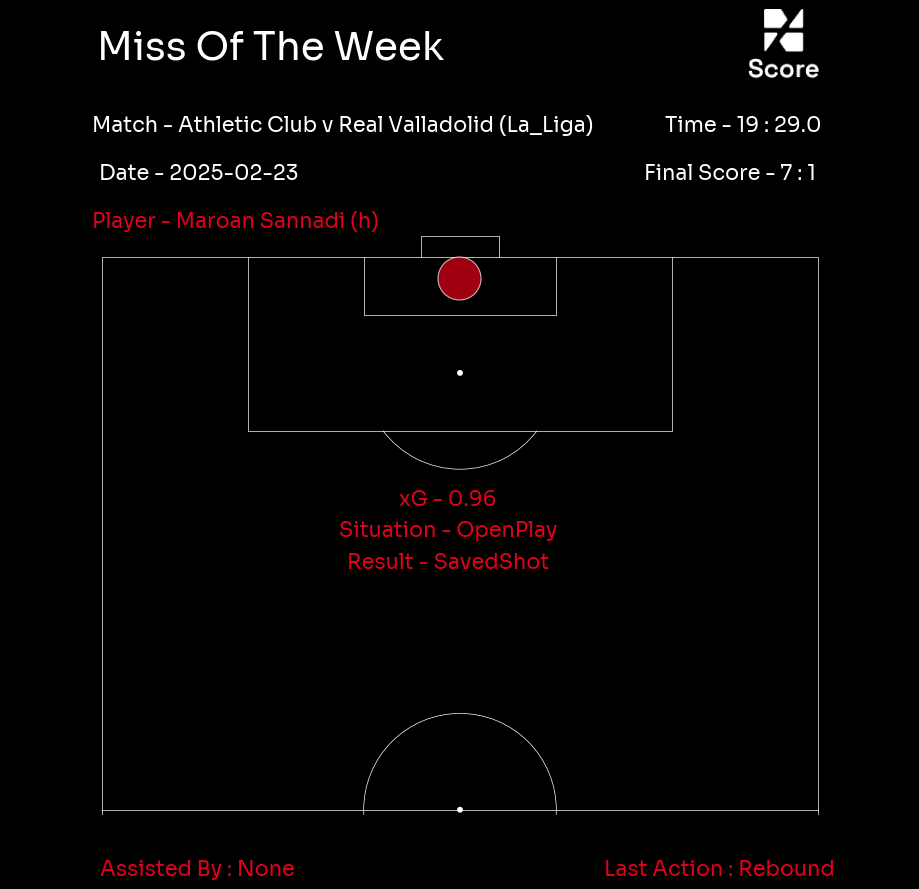

In [31]:
df_miss_high_xg1 = df_miss_high_xg.copy()
plot_miss_high_xg(df_miss_high_xg1)

## Goal Of the Week

## ShotMaps

### Top 9 Players Based on Number oof Shots Across Top 5 Leagues

In [153]:
query = """select player , count(*) as num_shots,
count(case when "result" = 'Goal' or "result" = 'SavedShot' or "result" = 'ShotOnPost' then 1 else null end) as num_shots_on_target,
count(case when "result" = 'Goal' then 1 else null end) as num_goals,
count(case when "result" = 'Goal' and situation != 'Penalty' then 1 else null end) as num_goals_non_penalty,
sum(round("xG" :: numeric ,2)) as total_xG,
sum(case when situation != 'Penalty' then round("xG" :: numeric ,2) else null end) as total_npxG
from understat_shots_tb ust
where season = '2024'
group by player
order by num_shots desc
limit 9;"""

with engine.connect() as conn:
    df_stats = pd.read_sql(query, conn)

In [154]:
df_stats

player  num_shots  num_shots_on_target  num_goals  \
0        Erling Haaland         89                   52         17   
1         Mohamed Salah         83                   44         18   
2       Antoine Semenyo         82                   26          6   
3       Nikola Krstovic         81                   28          6   
4  Kylian Mbappe-Lottin         80                   43         12   
5         Omar Marmoush         77                   38         15   
6           Cole Palmer         77                   35         14   
7  Valentín Castellanos         73                   29          7   
8    Robert Lewandowski         66                   36         16   

   num_goals_non_penalty  total_xg  total_npxg  
0                     16     19.26       17.74  
1                     13     16.73       12.93  
2                      6      9.03        9.03  
3                      5      7.77        6.25  
4                      8     14.51       10.81  
5                     13     10.47        8.95  
6                     11     10.87        8.59  
7                      5     12.15        9.87  
8                     14     18.34       16.12

In [155]:
df_stats['team'] = ['Man City','Liverpool','Bournemouth','Lecce','Real Madrid','Man City','Chelsea','Lazio','Barcelona']

In [156]:
query_shots = """ select "result","X","Y",situation,"shotType",player from understat_shots_tb ust
where season = '2024' and 
player in (select player from

(select player , count(*) as num_shots,
count(case when "result" = 'Goal' or "result" = 'SavedShot' or "result" = 'ShotOnPost' then 1 else null end) as num_shots_on_target,
count(case when "result" = 'Goal' then 1 else null end) as num_goals,
count(case when "result" = 'Goal' and situation != 'Penalty' then 1 else null end) as num_goals_non_penalty,
sum(round("xG" :: numeric ,2)) as total_xG,
sum(case when situation != 'Penalty' then round("xG" :: numeric ,2) else null end) as total_npxG
from understat_shots_tb ust
where season = '2024'
group by player
order by num_shots desc
limit 9) players);"""

with engine.connect() as conn:
    df_shots = pd.read_sql(query_shots, conn)

In [157]:
df_shots['player'].value_counts()

player
Erling Haaland          89
Mohamed Salah           83
Antoine Semenyo         82
Nikola Krstovic         81
Kylian Mbappe-Lottin    80
Omar Marmoush           77
Cole Palmer             77
Valentín Castellanos    73
Raphinha                66
Name: count, dtype: int64

### Top 9 Players Based on Number of Goals Across Top 5 Leagues

In [4]:
query = """select player , count(*) as num_shots,
count(case when "result" = 'Goal' or "result" = 'SavedShot' or "result" = 'ShotOnPost' then 1 else null end) as num_shots_on_target,
count(case when "result" = 'Goal' then 1 else null end) as num_goals,
count(case when "result" = 'Goal' and situation != 'Penalty' then 1 else null end) as num_goals_non_penalty,
sum(round("xG" :: numeric ,2)) as total_xG,
sum(case when situation != 'Penalty' then round("xG" :: numeric ,2) else null end) as total_npxG
from understat_shots_tb ust
where season = '2024'
group by player
order by num_goals desc
limit 9;"""

with engine.connect() as conn:
    df_stats = pd.read_sql(query, conn)

In [5]:
df_stats

player  num_shots  num_shots_on_target  num_goals  \
0         Mohamed Salah         90                   48         21   
1            Harry Kane         76                   39         21   
2         Mateo Retegui         65                   29         20   
3        Erling Haaland         93                   55         19   
4    Robert Lewandowski         72                   39         19   
5        Alexander Isak         64                   34         17   
6            Chris Wood         45                   27         17   
7  Kylian Mbappe-Lottin         92                   51         16   
8       Ousmane Dembélé         63                   36         16   

   num_goals_non_penalty  total_xg  total_npxg  
0                     15     18.01       13.45  
1                     12     18.74       11.90  
2                     18     13.33       11.05  
3                     18     20.13       18.61  
4                     17     19.94       17.72  
5                     16     14.10       13.34  
6                     14     11.93        9.65  
7                     11     17.18       12.74  
8                     15     12.06       11.30

In [6]:
df_stats['team'] = ['Liverpool','Bayern Munich','Atalanta','Man City','Barcelona','Newcastle','Nottingham Forest','Real Madrid','PSG']

In [7]:
query_shots = """ select "result","X","Y",situation,"shotType",player from understat_shots_tb ust
where season = '2024' and 
player in (select player from

(select player , count(*) as num_shots,
count(case when "result" = 'Goal' or "result" = 'SavedShot' or "result" = 'ShotOnPost' then 1 else null end) as num_shots_on_target,
count(case when "result" = 'Goal' then 1 else null end) as num_goals,
count(case when "result" = 'Goal' and situation != 'Penalty' then 1 else null end) as num_goals_non_penalty,
sum(round("xG" :: numeric ,2)) as total_xG,
sum(case when situation != 'Penalty' then round("xG" :: numeric ,2) else null end) as total_npxG
from understat_shots_tb ust
where season = '2024'
group by player
order by num_goals desc
limit 9) players);"""

with engine.connect() as conn:
    df_shots = pd.read_sql(query_shots, conn)

In [8]:
df_shots['player'].value_counts()

player
Erling Haaland          93
Kylian Mbappe-Lottin    92
Mohamed Salah           90
Harry Kane              76
Robert Lewandowski      72
Mateo Retegui           65
Alexander Isak          64
Ousmane Dembélé         63
Chris Wood              45
Name: count, dtype: int64

### Plot

In [9]:
df = df_shots.copy()
df['X'] = (df['X'] / 100) * 105 * 100
df['Y'] = (df['Y'] / 100) * 68 * 100

In [10]:
df.columns

Index(['result', 'X', 'Y', 'situation', 'shotType', 'player'], dtype='object')

In [11]:
df_stats['team'].unique()

array(['Liverpool', 'Bayern Munich', 'Atalanta', 'Man City', 'Barcelona',
       'Newcastle', 'Nottingham Forest', 'Real Madrid', 'PSG'],
      dtype=object)

In [12]:
df_stats.head()

player  num_shots  num_shots_on_target  num_goals  \
0       Mohamed Salah         90                   48         21   
1          Harry Kane         76                   39         21   
2       Mateo Retegui         65                   29         20   
3      Erling Haaland         93                   55         19   
4  Robert Lewandowski         72                   39         19   

   num_goals_non_penalty  total_xg  total_npxg           team  
0                     15     18.01       13.45      Liverpool  
1                     12     18.74       11.90  Bayern Munich  
2                     18     13.33       11.05       Atalanta  
3                     18     20.13       18.61       Man City  
4                     17     19.94       17.72      Barcelona

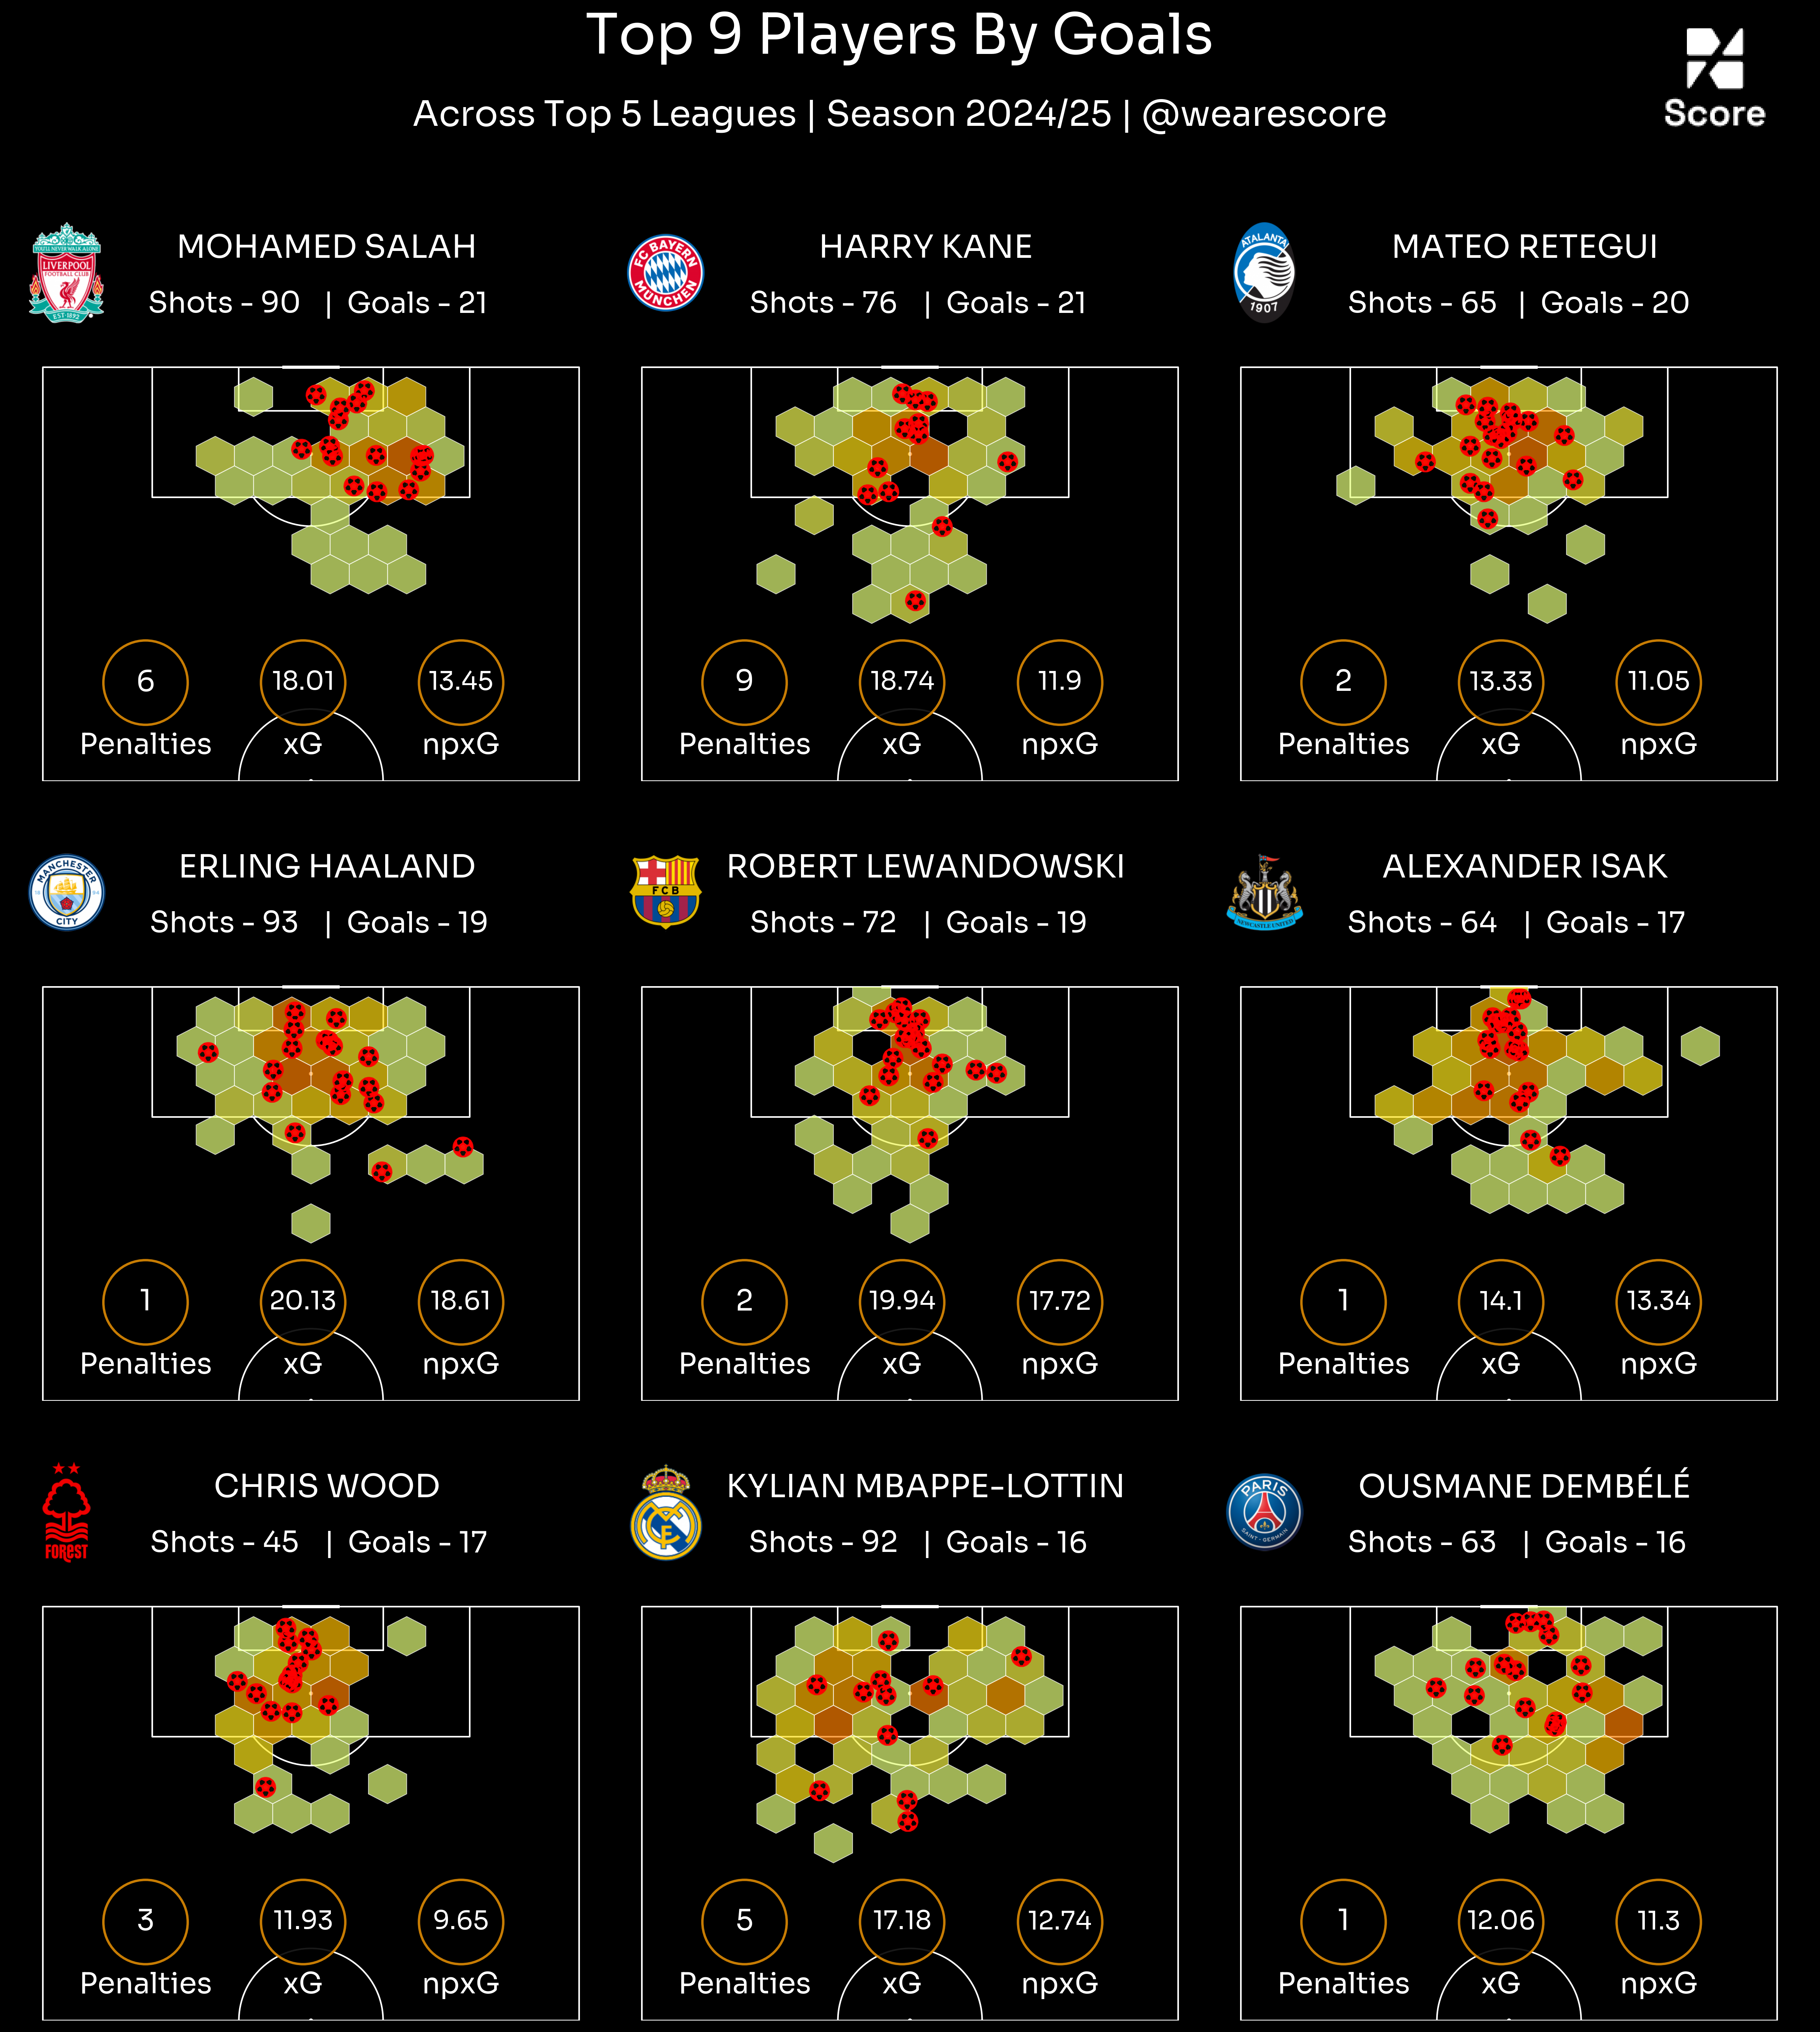

In [14]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

zoom_factor = 0.15

plt.rcParams['hatch.linewidth'] = 0.02
plt.rcParams['font.family'] = 'serif'
plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18,30), dpi=300)
axs = axs.flatten()  # Flatten the axis array for easy iteration

logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

ax_image = add_image(
    logo, fig, left=0.88, bottom=0.75, width=0.05, height=0.05,aspect='equal'
)

img_url = 'C:\\Users\\acer\\Documents\\GitHub\\IndianCitizen\\ScorePredict\\Images\\TeamLogos'
for index, ax in enumerate(axs):
    pitch = VerticalPitch(
    pitch_type='uefa',
    goal_type = 'line',
    half=True, 
    pitch_color=background, 
    stripe=False, 
    line_color='white',
    linewidth=1,
    line_zorder=2,pad_bottom=0, pad_top=20
    )
    pitch.draw(ax=ax)

    ax.annotate(text=f"{df_stats['player'].iloc[index].upper()}", xy=(32, 120), size=20, color='white', ha='center', va='center', font=font_prop)
    team_name = df_stats['team'].iloc[index]
    img = plt.imread(f"{img_url}\\{team_name}.png")  # Adjust file path as needed
    im = OffsetImage(img, zoom=0.35)  # Adjust zoom for size
    ab = AnnotationBbox(
        im, 
        (65, 117),  # Adjust coordinates for image placement
        frameon=False,
        xycoords='data'
    )
    ax.add_artist(ab)
    
    
    ax.annotate(text=f"Shots - {df_stats['num_shots'].iloc[index]}", xy=(45, 113), size=18, color='white', ha='center', va='center', font=font_prop)

    ax.annotate(text=f"|  Goals - {df_stats['num_goals'].iloc[index]}", xy=(22, 113), size=18, color='white', ha='center', va='center', font=font_prop)

    player_shots = df[df['player'] == df_stats['player'].iloc[index]]

    if not player_shots.empty:
        # Plot hexbin for the player's shots
        pitch.hexbin(
            player_shots.X, 
            player_shots.Y, 
            ax=ax, 
            edgecolors='white',
            gridsize=(14, 14), 
            cmap='Wistia', 
            alpha=0.7, 
            zorder=3
        )

    player_goals = player_shots[(player_shots['result'] == 'Goal') & (player_shots['situation'] != 'Penalty')]
    pitch.scatter(player_goals.X, player_goals.Y,s=150, ax=ax, zorder=4, edgecolors='red',marker='football',
                          alpha=0.9, linewidths=1.2, c=background)

    pitch.scatter(65, 55,s=2800, ax=ax, zorder=4, edgecolors='#DE8A04',alpha=0.9, lw=1.5, color=background)
    pitch.scatter(65, 35,s=2800, ax=ax, zorder=4, edgecolors='#DE8A04',alpha=0.9, lw=1.5, color=background)
    pitch.scatter(65, 15,s=2800, ax=ax, zorder=4, edgecolors='#DE8A04',alpha=0.9, lw=1.5, color=background)

    pitch.annotate(text=f"{df_stats['num_goals'].iloc[index] - df_stats['num_goals_non_penalty'].iloc[index]}",ax=ax, xy=(65, 55), size=18, color='white', ha='center', va='center',zorder=5, font=font_prop)
    pitch.annotate(text="Penalties",ax=ax, xy=(57, 55), size=18, color='white', ha='center', va='center',zorder=5, font=font_prop)

    pitch.annotate(text=f"{df_stats['total_xg'].iloc[index]}",ax=ax, xy=(65, 35), size=16, color='white', ha='center', va='center',zorder=5, font=font_prop)
    pitch.annotate(text="xG",ax=ax, xy=(57, 35), size=18, color='white', ha='center', va='center',zorder=5, font=font_prop)

    pitch.annotate(text=f"{df_stats['total_npxg'].iloc[index]}",ax=ax, xy=(65, 15), size=16, color='white', ha='center', va='center',zorder=5, font=font_prop)
    pitch.annotate(text="npxG",ax=ax, xy=(57, 15), size=18, color='white', ha='center', va='center',zorder=5, font=font_prop)


    
    

fig.patch.set_facecolor(background)
plt.subplots_adjust(wspace=0, hspace=-0.6)

fig.text(x=0.51, y=0.78, s=f"Top 9 Players By Goals", va="bottom", ha="center",
             fontsize=35, color="white", font=font_prop, weight="bold")
fig.text(x=0.51, y=0.76, s=f"Across Top 5 Leagues | Season 2024/25 | @wearescore",color="white",
         va="bottom", ha="center", fontsize=22, font=font_prop)

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/Top9EuropeGoals.png',dpi=500,bbox_inches = 'tight',facecolor=background)


In [ ]:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cmr.amber', 'cmr.amber_r', 'cmr.amethyst', 'cmr.amethyst_r', 'cmr.apple', 'cmr.apple_r', 'cmr.arctic', 'cmr.arctic_r', 'cmr.bubblegum', 'cmr.bubblegum_r', 'cmr.chroma', 'cmr.chroma_r', 'cmr.copper', 'cmr.copper_r', 'cmr.copper_s', 'cmr.copper_s_r', 'cmr.cosmic', 'cmr.cosmic_r', 'cmr.dusk', 'cmr.dusk_r', 'cmr.eclipse', 'cmr.eclipse_r', 'cmr.ember', 'cmr.ember_r', 'cmr.emerald', 'cmr.emerald_r', 'cmr.emergency', 'cmr.emergency_r', 'cmr.emergency_s', 'cmr.emergency_s_r', 'cmr.fall', 'cmr.fall_r', 'cmr.flamingo', 'cmr.flamingo_r', 'cmr.freeze', 'cmr.freeze_r', 'cmr.fusion', 'cmr.fusion_r', 'cmr.gem', 'cmr.gem_r', 'cmr.ghostlight', 'cmr.ghostlight_r', 'cmr.gothic', 'cmr.gothic_r', 'cmr.guppy', 'cmr.guppy_r', 'cmr.holly', 'cmr.holly_r', 'cmr.horizon', 'cmr.horizon_r', 'cmr.iceburn', 'cmr.iceburn_r', 'cmr.infinity', 'cmr.infinity_r', 'cmr.infinity_s', 'cmr.infinity_s_r', 'cmr.jungle', 'cmr.jungle_r', 'cmr.lavender', 'cmr.lavender_r', 'cmr.lilac', 'cmr.lilac_r', 'cmr.neon', 'cmr.neon_r', 'cmr.neutral', 'cmr.neutral_r', 'cmr.nuclear', 'cmr.nuclear_r', 'cmr.ocean', 'cmr.ocean_r', 'cmr.pepper', 'cmr.pepper_r', 'cmr.pride', 'cmr.pride_r', 'cmr.prinsenvlag', 'cmr.prinsenvlag_r', 'cmr.rainforest', 'cmr.rainforest_r', 'cmr.redshift', 'cmr.redshift_r', 'cmr.sapphire', 'cmr.sapphire_r', 'cmr.savanna', 'cmr.savanna_r', 'cmr.seasons', 'cmr.seasons_r', 'cmr.seasons_s', 'cmr.seasons_s_r', 'cmr.seaweed', 'cmr.seaweed_r', 'cmr.sepia', 'cmr.sepia_r', 'cmr.sunburst', 'cmr.sunburst_r', 'cmr.swamp', 'cmr.swamp_r', 'cmr.torch', 'cmr.torch_r', 'cmr.toxic', 'cmr.toxic_r', 'cmr.tree', 'cmr.tree_r', 'cmr.tropical', 'cmr.tropical_r', 'cmr.viola', 'cmr.viola_r', 'cmr.voltage', 'cmr.voltage_r', 'cmr.waterlily', 'cmr.waterlily_r', 'cmr.watermelon', 'cmr.watermelon_r', 'cmr.wildfire', 'cmr.wildfire_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

## Scatter Plots for Different Metrics

In [526]:
#https://x.com/DataAnalyticEPL/status/1869757409042006186

### OpenPlay V SetPiece xG

In [43]:
query = """SELECT 
    CASE 
        WHEN h_a = 'h' THEN h_team 
        ELSE a_team 
    END AS team,
    SUM(ROUND(CASE WHEN situation = 'OpenPlay' THEN "xG"::NUMERIC ELSE 0 END, 2)) AS xG_openplay,
    SUM(ROUND(CASE WHEN situation = 'SetPiece' or situation = 'FromCorner' or situation = 'DirectFreekick' THEN "xG"::NUMERIC ELSE 0 END, 2)) AS xG_setpiece
FROM understat_shots_tb ust
WHERE 
    season = '2024' 
    AND league = 'La_Liga'
GROUP BY 
    CASE 
        WHEN h_a = 'h' THEN h_team 
        ELSE a_team 
    END;"""

with engine.connect() as conn:
    df = pd.read_sql(query, conn)

In [44]:
df

team  xg_openplay  xg_setpiece
0            Alaves        17.92         3.79
1     Athletic Club        23.47         5.28
2   Atletico Madrid        33.95         3.54
3         Barcelona        43.93         7.54
4        Celta Vigo        26.24         2.84
5          Espanyol        14.33         5.23
6            Getafe        13.10         4.29
7            Girona        21.03         4.17
8        Las Palmas        16.78         3.05
9           Leganes        11.00         3.90
10         Mallorca        16.72         6.99
11          Osasuna        14.65         4.45
12   Rayo Vallecano        18.56         5.63
13       Real Betis        24.12         6.60
14      Real Madrid        34.30         5.76
15    Real Sociedad        19.76         3.43
16  Real Valladolid        12.97         3.08
17          Sevilla        18.56         3.71
18         Valencia        14.26         5.51
19       Villarreal        30.02         8.36

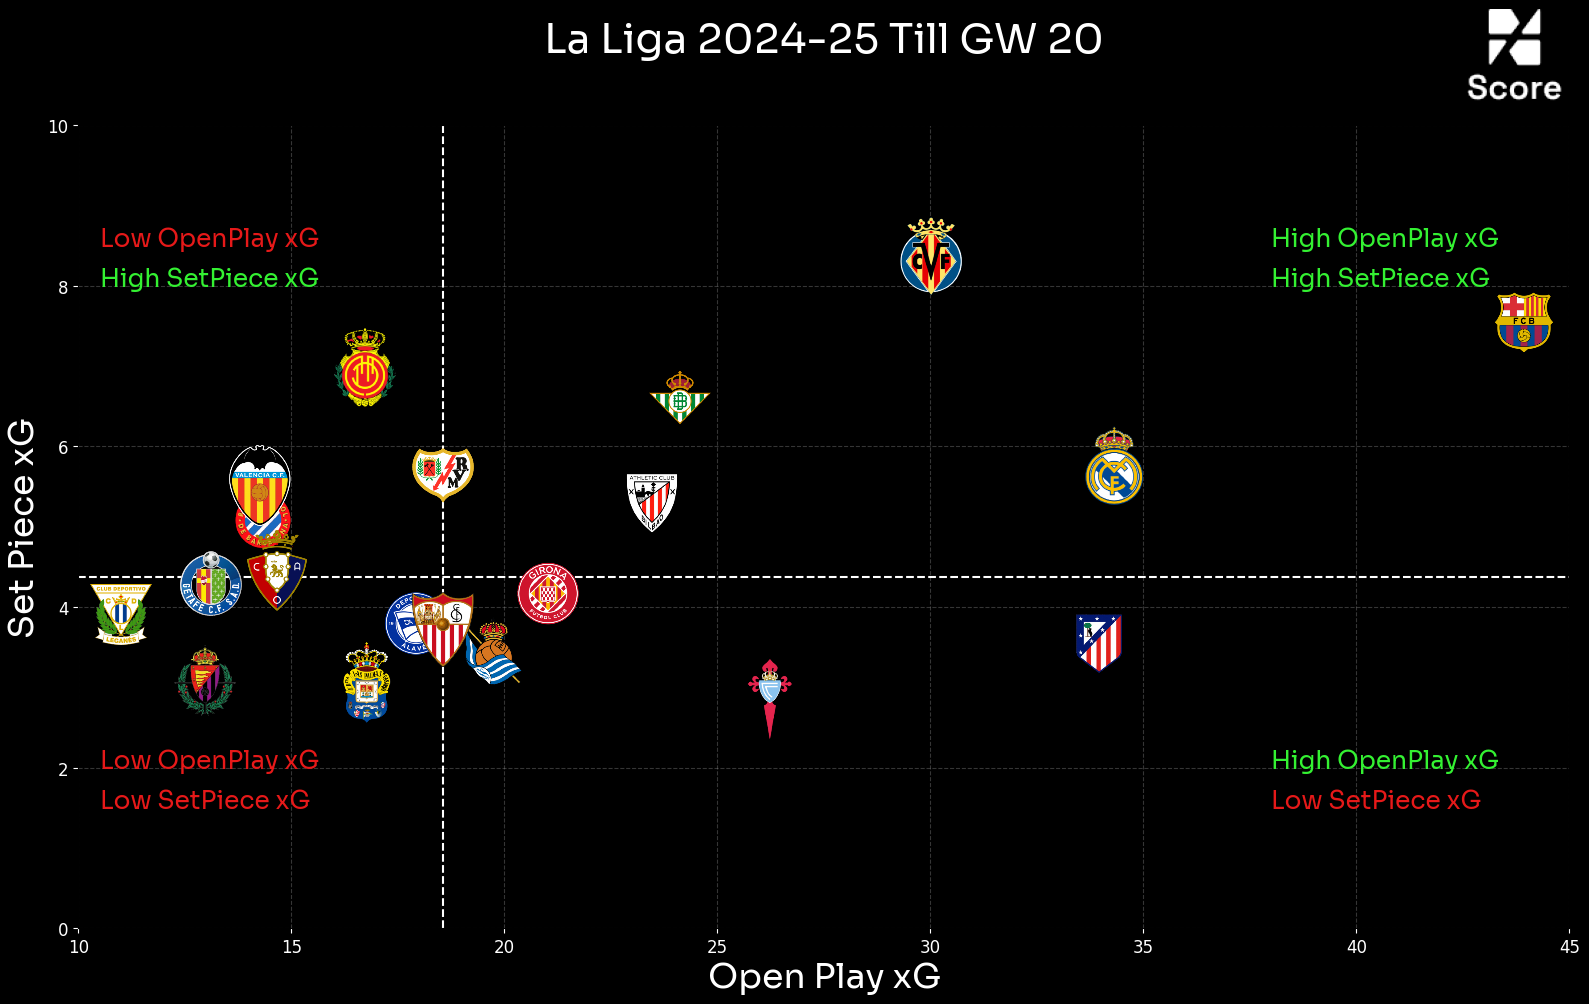

In [53]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pandas as pd
from PIL import Image

# Function to load logos
def get_team_logo(team_name, logo_dir='C://Users//acer//Desktop//IndianCityzen//football-logos-master//logos//Spain - LaLiga//'):
    logo_path = f"{logo_dir}{team_name}.png"
    try:
        logo = Image.open(logo_path)
        return logo
    except FileNotFoundError:
        print(f"Logo for {team_name} not found at {logo_path}")
        return None

# Create scatter plot
fig, ax = plt.subplots(figsize=(16, 10))
fig.patch.set_facecolor(background)
ax.patch.set_facecolor(background)

for _, row in df.iterrows():
    team, xg_openplay, xg_setpiece = row['team'], row['xg_openplay'], row['xg_setpiece']
    logo = get_team_logo(team)
    if logo:
        imagebox = OffsetImage(logo, zoom=0.32)  # Adjust zoom for size
        ab = AnnotationBbox(imagebox, (xg_openplay, xg_setpiece), frameon=False)
        ax.add_artist(ab)
    else:
        # Plot a regular scatter point if logo not found
        ax.scatter(xg_openplay, xg_setpiece, color='red', label=team)

median_openplay_xG = df['xg_openplay'].median()
median_setpiece_xG = df['xg_setpiece'].median()
ax.axvline(median_openplay_xG, color='white', linestyle='--', lw=1.5, label=f'Median Open Play xG ({median_openplay_xG:.2f})')
ax.axhline(median_setpiece_xG, color='white', linestyle='--', lw=1.5, label=f'Median Set Piece xG ({median_setpiece_xG:.2f})')

logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

ax_image = add_image(
    logo, fig, left=0.9, bottom=0.9, width=0.1, height=0.1,aspect='equal'
)

# Customize the plot
ax.set_xlim(10, 45)
ax.set_ylim(0, 10)
ax.set_xlabel('Open Play xG',font=font_prop,color='white', fontsize=25)
ax.set_ylabel('Set Piece xG',font=font_prop,color='white', fontsize=25)
ax.set_title('La Liga 2024-25 Till GW 20',font=font_prop,color='white', fontsize=30,y=1.08, fontweight='bold')

ax.text(38,8.5,'High OpenPlay xG',font=font_prop,color='#34F132', fontsize=18)
ax.text(38,8,'High SetPiece xG',font=font_prop,color='#34F132', fontsize=18)


ax.text(10.5,8.5,'Low OpenPlay xG',font=font_prop,color='#E61919', fontsize=18)
ax.text(10.5,8,'High SetPiece xG',font=font_prop,color='#34F132', fontsize=18)

ax.text(38,2,'High OpenPlay xG',font=font_prop,color='#34F132', fontsize=18)
ax.text(38,1.5,'Low SetPiece xG',font=font_prop,color='#E61919', fontsize=18)

ax.text(10.5,2,'Low OpenPlay xG',font=font_prop,color='#E61919', fontsize=18)
ax.text(10.5,1.5,'Low SetPiece xG',font=font_prop,color='#E61919', fontsize=18)


ax.tick_params(axis='x', colors='white', labelsize=12)  # X-axis tick labels in green
ax.tick_params(axis='y', colors='white', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/OpenPlayVSetPieceLaLiga.png',dpi=500,bbox_inches = 'tight',facecolor=background)


## Radar / Pizza Plots

In [35]:
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.image as mpimg

font_normal = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/'
                          'src/hinted/Roboto-Regular.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/googlefonts/roboto/main/'
                          'src/hinted/Roboto-Italic.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab[wght].ttf')
img1 = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/Images/Players/AK.jpg')

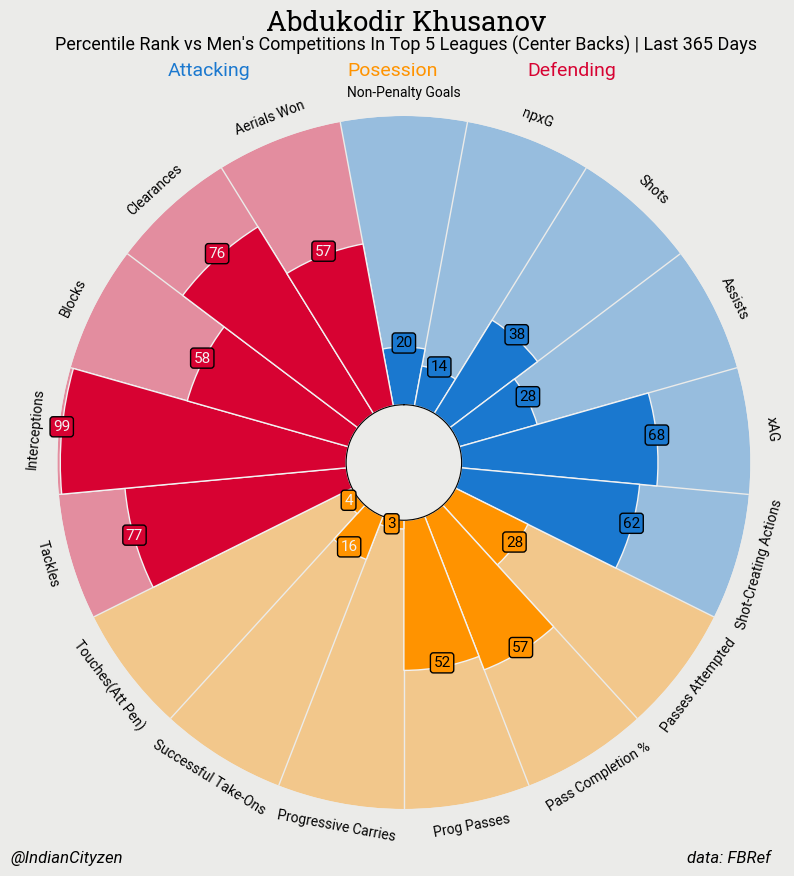

In [4]:
# parameter list
params = ["Non-Penalty Goals", "npxG", "Shots", "Assists", "xAG","Shot-Creating Actions",
          "Passes Attempted","Pass Completion %", "Prog Passes", "Progressive Carries", "Successful Take-Ons","Touches(Att Pen)",
          "Tackles","Interceptions","Blocks","Clearances","Aerials Won"]

# value list
# The values are taken from the excellent fbref website (supplied by StatsBomb)
values = [
    20, 14, 38, 28, 68,62,
    28, 57, 52, 3, 16,4,
    77, 99, 58, 76, 57
]

# color for the slices and text
slice_colors = ["#1A78CF"] * 6 + ["#FF9300"] * 6 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 7

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(9, 9),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=10,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.975, "Abdukodir Khusanov", size=20,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.953,
    "Percentile Rank vs Men's Competitions In Top 5 Leagues (Center Backs) | Last 365 Days",
    size=13,
    ha="center", fontproperties=font_normal.prop, color="#000000"
)

# add credits
CREDIT_1 = "data: FBRef"

fig.text(
    0.92, 0.05, f"{CREDIT_1}", size=12,
    fontproperties=font_italic.prop, color="#000000",
    ha="right"
)

fig.text(
    0.2, 0.05, f"@IndianCityzen", size=12,
    fontproperties=font_italic.prop, color="#000000",
    ha="right"
)

# add text
fig.text(
    0.25, 0.925, "Attacking", size=14,
    fontproperties=font_normal.prop, color="#1a78cf"
)

fig.text(
    0.45, 0.925, "Posession", size=14,
    fontproperties=font_normal.prop, color="#ff9300"
)

fig.text(
    0.65, 0.925, "Defending", size=14,
    fontproperties=font_normal.prop, color="#d70232"
)

plt.savefig('C:/Users/acer/Documents/GitHub/IndianCitizen/PlayerReports/AK.png',dpi=500,bbox_inches = 'tight',facecolor="#EBEBE9")

## xG For V xG Against Time Series Plot

In [4]:
query = """WITH team_shots AS (
    SELECT 
        h_team AS team,
        match_id,
        season,
        date,
        SUM("xG") AS xg_sum
    FROM understat_shots_tb
    WHERE league = 'EPL' AND season >= EXTRACT(YEAR FROM CURRENT_DATE) - 4 AND h_a = 'h'
    GROUP BY h_team, match_id, season, date
    
    UNION
    
    SELECT 
        a_team AS team,
        match_id,
        season,
        date,
        SUM("xG") AS xg_sum
    FROM understat_shots_tb
    WHERE league = 'EPL' AND season >= EXTRACT(YEAR FROM CURRENT_DATE) - 4 AND h_a = 'a'
    GROUP BY a_team, match_id, season, date
),
team_shots_against AS (
    SELECT 
        a_team AS team,
        match_id,
        season,
        date,
        SUM("xG") AS xg_against_sum
    FROM understat_shots_tb
    WHERE league = 'EPL' AND season >= EXTRACT(YEAR FROM CURRENT_DATE) - 4 AND h_a = 'h'
    GROUP BY a_team, match_id, season, date
    
    UNION
    
    SELECT 
        h_team AS team,
        match_id,
        season,
        date,
        SUM("xG") AS xg_against_sum
    FROM understat_shots_tb
    WHERE league = 'EPL' AND season >= EXTRACT(YEAR FROM CURRENT_DATE) - 4 AND h_a = 'a'
    GROUP BY h_team, match_id, season, date
),
team_matches AS (
    SELECT 
        shots.team,
        shots.season,
        shots.match_id,
        shots.date,
        shots.xg_sum,
        COALESCE(against.xg_against_sum, 0) AS xg_against_sum,
        ROW_NUMBER() OVER (PARTITION BY shots.team, shots.season ORDER BY shots.date) AS match_number
    FROM team_shots AS shots
    LEFT JOIN team_shots_against AS against
        ON shots.team = against.team AND shots.match_id = against.match_id
),
rolling_xg AS (
    SELECT 
        team,
        season,
        match_id,
        date,
        match_number,
        xg_sum,
        xg_against_sum,
        SUM(xg_sum) OVER (PARTITION BY team, season ORDER BY match_number ROWS BETWEEN 9 PRECEDING AND CURRENT ROW) AS rolling_xg,
        SUM(xg_against_sum) OVER (PARTITION BY team, season ORDER BY match_number ROWS BETWEEN 9 PRECEDING AND CURRENT ROW) AS rolling_xg_against
    FROM team_matches
)
SELECT 
    team,
    season,
    --match_id,
    date,
    xg_sum AS xg_per_game,            -- Sum of xG for the current game
    xg_against_sum AS xg_against_per_game, -- Sum of xG conceded for the current game
    rolling_xg,                       -- Rolling sum of xG over 10 games
    rolling_xg_against,                -- Rolling sum of xG conceded over 10 games
    rolling_xg - rolling_xg_against as rolling_diff
FROM rolling_xg
ORDER BY team, season, date;"""

with engine.connect() as conn:
    df_xg = pd.read_sql(query, conn)

In [5]:
df_xg['team'].unique()

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton',
       'Burnley', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham',
       'Ipswich', 'Leeds', 'Leicester', 'Liverpool', 'Luton',
       'Manchester City', 'Manchester United', 'Newcastle United',
       'Norwich', 'Nottingham Forest', 'Sheffield United', 'Southampton',
       'Tottenham', 'Watford', 'West Ham', 'Wolverhampton Wanderers'],
      dtype=object)

In [6]:
df_team = df_xg[df_xg['team'] == 'Nottingham Forest']

In [23]:
top_9_cm = {
    'Liverpool': {
        'low': '#00B2A9',
        'high': '#c8102E'
    },
    
    'Arsenal': {
        'low':'#FFFFFF',
        'high':'#EF0107'
    },
    'Nottingham Forest': {
        'low': 'green',
        'high': '#EF0107'
    },
    'Chelsea': {
        'low': '#dba111',
        'high': '#034694'
    },
    'Newcastle United': {
        'low': '#41B6E6',
        'high': '#FFFFFF'
    },
    
    'Manchester City':{
        'low':'#1C2C5B',
        'high':'#6CABDD'
    },
    'Bournemouth':{
        'low':'#EFDBB2',
        'high':'#DA291C'
    },
    'Fulham':{
        'low':'#CC0000',
        'high':'#FFFFFF'
    },
    'Aston Villa':{
        'low':'#95bfe5',
        'high':'#670e36'
    },
}

In [7]:
df_team.tail(10)

team  season                date  xg_per_game  \
2110  Nottingham Forest    2024 2024-11-23 15:00:00     0.403136   
2111  Nottingham Forest    2024 2024-11-30 15:00:00     1.765873   
2112  Nottingham Forest    2024 2024-12-04 19:30:00     0.802155   
2113  Nottingham Forest    2024 2024-12-07 17:30:00     0.652800   
2114  Nottingham Forest    2024 2024-12-14 17:30:00     2.287121   
2115  Nottingham Forest    2024 2024-12-21 15:00:00     0.964897   
2116  Nottingham Forest    2024 2024-12-26 15:00:00     1.316297   
2117  Nottingham Forest    2024 2024-12-29 15:00:00     2.174932   
2118  Nottingham Forest    2024 2025-01-06 20:00:00     2.572274   
2119  Nottingham Forest    2024 2025-01-14 20:00:00     0.529200   

      xg_against_per_game  rolling_xg  rolling_xg_against  rolling_diff  
2110             1.676884   14.060689           12.964706      1.095983  
2111             0.462771   14.415875           12.324393      2.091482  
2112             3.223611   14.628498           14.377563      0.250935  
2113             1.662318   13.912068           14.471522     -0.559454  
2114             0.389423   15.582887           13.421129      2.161759  
2115             0.769004   14.881246           11.907561      2.973685  
2116             1.057578   14.306143           12.129271      2.176872  
2117             0.615191   13.895838           11.912046      1.983791  
2118             1.964372   14.118004           13.744101      0.373903  
2119             2.722909   13.468685           14.544061     -1.075376

In [8]:
# Sort the dataframe by date
df_team = df_team.sort_values(by='date')

# Assign match numbers
df_team['Match Number'] = range(1, len(df_team) + 1)

# Reset the index (optional)
df_team = df_team.reset_index(drop=True)

In [9]:
df_team.columns

Index(['team', 'season', 'date', 'xg_per_game', 'xg_against_per_game',
       'rolling_xg', 'rolling_xg_against', 'rolling_diff', 'Match Number'],
      dtype='object')

In [201]:
38*3

114

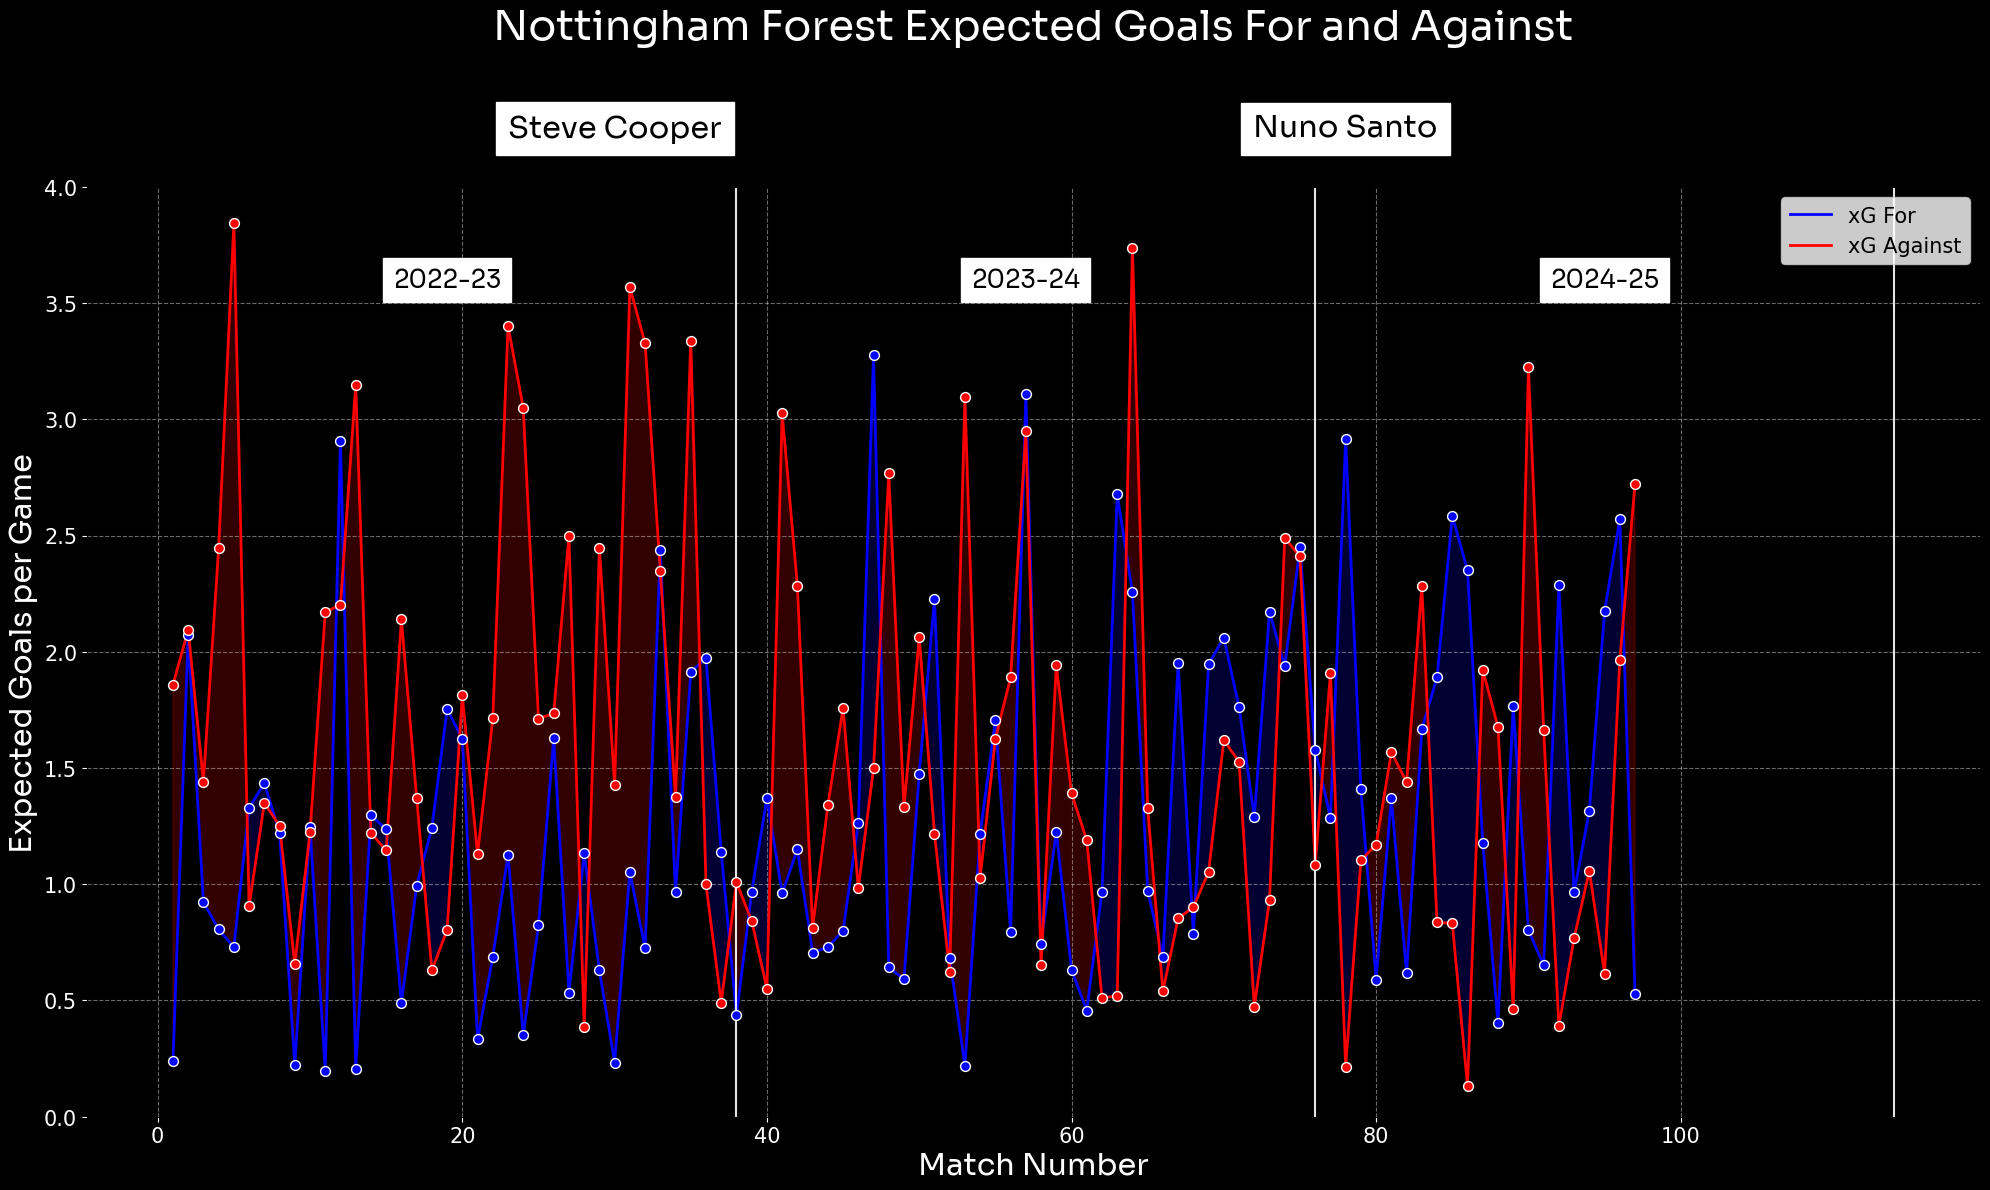

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import FancyArrow

fig, ax = plt.subplots(figsize=(20, 12))
fig.patch.set_facecolor(background)
ax.patch.set_facecolor(background)
# Plot xG For and Against
ax.plot(df_team['Match Number'], df_team['xg_per_game'], label='xG For', color='blue', lw=2)
ax.plot(df_team['Match Number'], df_team['xg_against_per_game'], label='xG Against', color='red', lw=2)

# Shaded area between xG For and Against
ax.fill_between(df_team['Match Number'], df_team['xg_per_game'], df_team['xg_against_per_game'],
                where=(df_team['xg_per_game'] > df_team['xg_against_per_game']), interpolate=True, color='blue', alpha=0.2)
ax.fill_between(df_team['Match Number'], df_team['xg_per_game'], df_team['xg_against_per_game'],
                where=(df_team['xg_per_game'] <= df_team['xg_against_per_game']), interpolate=True, color='red', alpha=0.2)


# Scatter points for actual xG For and xG Against
ax.scatter(df_team['Match Number'], df_team['xg_per_game'], color='blue', edgecolors='white', s=50, zorder=3)
ax.scatter(df_team['Match Number'], df_team['xg_against_per_game'], color='red', edgecolors='white', s=50, zorder=3)

# Add vertical lines and season annotations
season_splits = [38, 76, 114]  # Match numbers where seasons end
seasons = ['2022-23','2023-24','2024-25']
for i, split in enumerate(season_splits):
    ax.axvline(split, color='white', linestyle='-', alpha=0.9)
    ax.text(split - 19, 3.6, seasons[i], color='black', backgroundcolor='white',
            ha='center', va='center', fontsize=18, font=font_prop)

# Customize chart
ax.set_title("Nottingham Forest Expected Goals For and Against",font=font_prop,color='white',fontsize=30,y=1.15)
ax.text(30,4.25,'Steve Cooper',color='black', backgroundcolor='white',
            ha='center', va='center', fontsize=22, font=font_prop)

ax.text(78,4.25,'Nuno Santo',color='black', backgroundcolor='white',
            ha='center', va='center', fontsize=22, font=font_prop)

ax.set_xlabel('Match Number',color='white',font=font_prop, fontsize=22)
ax.set_ylabel('Expected Goals per Game',color='white',font=font_prop, fontsize=22)
ax.set_ylim(0, 4)
ax.grid(ls='--', color='lightgrey', alpha=0.5)
ax.legend(fontsize=15, loc='upper right')
ax.tick_params(axis='both', which='major',color='white', labelsize=10)


ax.tick_params(axis='x', colors='white', labelsize=15)  # X-axis tick labels in green
ax.tick_params(axis='y', colors='white', labelsize=15)
# Show plot
plt.tight_layout()

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/NotFor.png',dpi=500,bbox_inches = 'tight',facecolor=background)


## Passing Networks

In [3]:
# Put the match HTML file path here
match_html_path = "C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/HTMLs/ManCity/29.html"

def extract_json_from_html(html_path, save_output=False):
    with open(html_path, 'r', encoding='utf-8') as html_file:
        html = html_file.read()

    regex_pattern = r'(?<=require\.config\.params\["args"\].=.)[\s\S]*?;'
    data_txt = re.findall(regex_pattern, html)[0]

    # add quotations for JSON parser
    data_txt = data_txt.replace('matchId', '"matchId"')
    data_txt = data_txt.replace('matchCentreData', '"matchCentreData"')
    data_txt = data_txt.replace('matchCentreEventTypeJson', '"matchCentreEventTypeJson"')
    data_txt = data_txt.replace('formationIdNameMappings', '"formationIdNameMappings"')
    data_txt = data_txt.replace('};', '}')

    if save_output:
        # save JSON data to txt
        output_file = open(f"{html_path}.txt", "wt", encoding='utf-8')
        n = output_file.write(data_txt)
        output_file.close()

    return data_txt

def extract_data_from_dict(data):
    # load data from json
    event_types_json = data["matchCentreEventTypeJson"]
    formation_mappings = data["formationIdNameMappings"]
    events_dict = data["matchCentreData"]["events"]
    teams_dict = {data["matchCentreData"]['home']['teamId']: data["matchCentreData"]['home']['name'],
                  data["matchCentreData"]['away']['teamId']: data["matchCentreData"]['away']['name']}
    players_dict = data["matchCentreData"]["playerIdNameDictionary"]
    # create players dataframe
    players_home_df = pd.DataFrame(data["matchCentreData"]['home']['players'])
    players_home_df["teamId"] = data["matchCentreData"]['home']['teamId']
    players_away_df = pd.DataFrame(data["matchCentreData"]['away']['players'])
    players_away_df["teamId"] = data["matchCentreData"]['away']['teamId']
    players_df = pd.concat([players_home_df, players_away_df])
    players_ids = data["matchCentreData"]["playerIdNameDictionary"]
    return events_dict, players_df, teams_dict


json_data_txt = extract_json_from_html(match_html_path)
data = json.loads(json_data_txt)
events_dict, players_df, teams_dict = extract_data_from_dict(data)

df = pd.DataFrame(events_dict)
dfp = pd.DataFrame(players_df)

# Extract the 'displayName' value
df['type'] = df['type'].apply(lambda x: x['displayName'] if isinstance(x, dict) else None)
df['outcomeType'] = df['outcomeType'].apply(lambda x: x['displayName'] if isinstance(x, dict) else None)
df['period'] = df['period'].apply(lambda x: x['displayName'] if isinstance(x, dict) else None)

# temprary use of typeId of period column
df['period'] = df['period'].replace({'FirstHalf': 1, 'SecondHalf': 2, 'FirstPeriodOfExtraTime': 3, 'SecondPeriodOfExtraTime': 4,
                                     'PenaltyShootout': 5, 'PostGame': 14, 'PreMatch': 16})

# new column for cumulative minutes, This part is taken from the "jakeyk11.github.io" github repository and modified for my use
def cumulative_match_mins(events_df):
    events_out = pd.DataFrame()
    # Add cumulative time to events data, resetting for each unique match
    match_events = events_df.copy()
    match_events['cumulative_mins'] = match_events['minute'] + (1/60) * match_events['second']
    # Add time increment to cumulative minutes based on period of game.
    for period in np.arange(1, match_events['period'].max() + 1, 1):
        if period > 1:
            t_delta = match_events[match_events['period'] == period - 1]['cumulative_mins'].max() - \
                                   match_events[match_events['period'] == period]['cumulative_mins'].min()
        elif period == 1 or period == 5:
            t_delta = 0
        else:
            t_delta = 0
        match_events.loc[match_events['period'] == period, 'cumulative_mins'] += t_delta
    # Rebuild events dataframe
    events_out = pd.concat([events_out, match_events])
    return events_out

df = cumulative_match_mins(df)

# Extracting the carry data and merge it with the main df, This part is also taken from the "jakeyk11.github.io" github repository and modified for my use
def insert_ball_carries(events_df, min_carry_length=3, max_carry_length=60, min_carry_duration=1, max_carry_duration=10):
    events_out = pd.DataFrame()
    # Carry conditions (convert from metres to opta)
    min_carry_length = 3.0
    max_carry_length = 60.0
    min_carry_duration = 1.0
    max_carry_duration = 10.0
    # match_events = events_df[events_df['match_id'] == match_id].reset_index()
    match_events = events_df.reset_index()
    match_carries = pd.DataFrame()

    for idx, match_event in match_events.iterrows():

        if idx < len(match_events) - 1:
            prev_evt_team = match_event['teamId']
            next_evt_idx = idx + 1
            init_next_evt = match_events.loc[next_evt_idx]
            take_ons = 0
            incorrect_next_evt = True

            while incorrect_next_evt:

                next_evt = match_events.loc[next_evt_idx]

                if next_evt['type'] == 'TakeOn' and next_evt['outcomeType'] == 'Successful':
                    take_ons += 1
                    incorrect_next_evt = True

                elif ((next_evt['type'] == 'TakeOn' and next_evt['outcomeType'] == 'Unsuccessful')
                      or (next_evt['teamId'] != prev_evt_team and next_evt['type'] == 'Challenge' and next_evt['outcomeType'] == 'Unsuccessful')
                      or (next_evt['type'] == 'Foul')):
                    incorrect_next_evt = True

                else:
                    incorrect_next_evt = False

                next_evt_idx += 1

            # Apply some conditioning to determine whether carry criteria is satisfied
            same_team = prev_evt_team == next_evt['teamId']
            not_ball_touch = match_event['type'] != 'BallTouch'
            dx = 105*(match_event['endX'] - next_evt['x'])/100
            dy = 68*(match_event['endY'] - next_evt['y'])/100
            far_enough = dx ** 2 + dy ** 2 >= min_carry_length ** 2
            not_too_far = dx ** 2 + dy ** 2 <= max_carry_length ** 2
            dt = 60 * (next_evt['cumulative_mins'] - match_event['cumulative_mins'])
            min_time = dt >= min_carry_duration
            same_phase = dt < max_carry_duration
            same_period = match_event['period'] == next_evt['period']

            valid_carry = same_team & not_ball_touch & far_enough & not_too_far & min_time & same_phase &same_period

            if valid_carry:
                carry = pd.DataFrame()
                prev = match_event
                nex = next_evt

                carry.loc[0, 'eventId'] = prev['eventId'] + 0.5
                carry['minute'] = np.floor(((init_next_evt['minute'] * 60 + init_next_evt['second']) + (
                        prev['minute'] * 60 + prev['second'])) / (2 * 60))
                carry['second'] = (((init_next_evt['minute'] * 60 + init_next_evt['second']) +
                                    (prev['minute'] * 60 + prev['second'])) / 2) - (carry['minute'] * 60)
                carry['teamId'] = nex['teamId']
                carry['x'] = prev['endX']
                carry['y'] = prev['endY']
                carry['expandedMinute'] = np.floor(((init_next_evt['expandedMinute'] * 60 + init_next_evt['second']) +
                                                    (prev['expandedMinute'] * 60 + prev['second'])) / (2 * 60))
                carry['period'] = nex['period']
                carry['type'] = carry.apply(lambda x: {'value': 99, 'displayName': 'Carry'}, axis=1)
                carry['outcomeType'] = 'Successful'
                carry['qualifiers'] = carry.apply(lambda x: {'type': {'value': 999, 'displayName': 'takeOns'}, 'value': str(take_ons)}, axis=1)
                carry['satisfiedEventsTypes'] = carry.apply(lambda x: [], axis=1)
                carry['isTouch'] = True
                carry['playerId'] = nex['playerId']
                carry['endX'] = nex['x']
                carry['endY'] = nex['y']
                carry['blockedX'] = np.nan
                carry['blockedY'] = np.nan
                carry['goalMouthZ'] = np.nan
                carry['goalMouthY'] = np.nan
                carry['isShot'] = np.nan
                carry['relatedEventId'] = nex['eventId']
                carry['relatedPlayerId'] = np.nan
                carry['isGoal'] = np.nan
                carry['cardType'] = np.nan
                carry['isOwnGoal'] = np.nan
                carry['type'] = 'Carry'
                carry['cumulative_mins'] = (prev['cumulative_mins'] + init_next_evt['cumulative_mins']) / 2

                match_carries = pd.concat([match_carries, carry], ignore_index=True, sort=False)

    match_events_and_carries = pd.concat([match_carries, match_events], ignore_index=True, sort=False)
    match_events_and_carries = match_events_and_carries.sort_values(['period', 'cumulative_mins']).reset_index(drop=True)

    # Rebuild events dataframe
    events_out = pd.concat([events_out, match_events_and_carries])

    return events_out

df = insert_ball_carries(df, min_carry_length=3, max_carry_length=60, min_carry_duration=1, max_carry_duration=10)

df = df.reset_index(drop=True)
df['index'] = range(1, len(df) + 1)
df = df[['index'] + [col for col in df.columns if col != 'index']]

# Assign xT values
df_base  = df
dfxT = df_base.copy()
dfxT['qualifiers'] = dfxT['qualifiers'].astype(str)
dfxT = dfxT[(~dfxT['qualifiers'].str.contains('Corner'))]
dfxT = dfxT[(dfxT['type'].isin(['Pass', 'Carry'])) & (dfxT['outcomeType']=='Successful')]


xT = pd.read_csv('https://raw.githubusercontent.com/mckayjohns/youtube-videos/main/data/xT_Grid.csv', header=None) # use this if you don't have your own xT value Grid
# xT = pd.read_csv("/content/xT_Grid.csv", header=None)    # use this if you have your own xT value Grid, then place your file path here
xT = np.array(xT)
xT_rows, xT_cols = xT.shape

dfxT['x1_bin_xT'] = pd.cut(dfxT['x'], bins=xT_cols, labels=False)
dfxT['y1_bin_xT'] = pd.cut(dfxT['y'], bins=xT_rows, labels=False)
dfxT['x2_bin_xT'] = pd.cut(dfxT['endX'], bins=xT_cols, labels=False)
dfxT['y2_bin_xT'] = pd.cut(dfxT['endY'], bins=xT_rows, labels=False)

dfxT['start_zone_value_xT'] = dfxT[['x1_bin_xT', 'y1_bin_xT']].apply(lambda x: xT[x[1]][x[0]], axis=1)
dfxT['end_zone_value_xT'] = dfxT[['x2_bin_xT', 'y2_bin_xT']].apply(lambda x: xT[x[1]][x[0]], axis=1)

dfxT['xT'] = dfxT['end_zone_value_xT'] - dfxT['start_zone_value_xT']
columns_to_drop = ['id', 'eventId', 'minute', 'second', 'teamId', 'x', 'y', 'expandedMinute', 'period', 'outcomeType', 'qualifiers',  'type',
                   'satisfiedEventsTypes', 'isTouch', 'playerId', 'endX', 'endY', 'relatedEventId', 'relatedPlayerId', 'blockedX', 'blockedY',
                   'goalMouthZ', 'goalMouthY', 'isShot', 'cumulative_mins']
dfxT.drop(columns=columns_to_drop, inplace=True)

df = df.merge(dfxT, on='index', how='left')

# New Column for Team Names and Oppositon TeamNames
df['teamName'] = df['teamId'].map(teams_dict)
team_names = list(teams_dict.values())
opposition_dict = {team_names[i]: team_names[1-i] for i in range(len(team_names))}
df['oppositionTeamName'] = df['teamName'].map(opposition_dict)

# Reshaping the data from 100x100 to 105x68, as I use the pitch_type='uefa', in the pitch function, you can consider according to your use
df['x'] = df['x']*1.05
df['y'] = df['y']*0.68
df['endX'] = df['endX']*1.05
df['endY'] = df['endY']*0.68
df['goalMouthY'] = df['goalMouthY']*0.68

columns_to_drop = ['height', 'weight', 'age', 'isManOfTheMatch', 'field', 'stats',
                   'subbedInPlayerId', 'subbedOutPeriod',
                   'subbedOutExpandedMinute', 'subbedInPeriod', 'subbedInExpandedMinute', 'subbedOutPlayerId',
                   'teamId']
dfp.drop(columns=columns_to_drop, inplace=True)

# adding player name, shirt no. etc info
df = df.merge(dfp, on='playerId', how='left')

df['qualifiers'] = df['qualifiers'].astype(str)
# Calculating passing distance, to find out progressive pass, this will just show the distance reduced by a pass, then will be able to filter passes which has reduced distance value more than 10yds as a progressive pass
df['prog_pass'] = np.where((df['type'] == 'Pass'),
                           np.sqrt((105 - df['x'])**2 + (34 - df['y'])**2) - np.sqrt((105 - df['endX'])**2 + (34 - df['endY'])**2), 0)
# Calculating carrying distance, to find out progressive carry, this will just show the distance reduced by a carry, then will be able to filter carries which has reduced distance value more than 10yds as a progressive carry
df['prog_carry'] = np.where((df['type'] == 'Carry'),
                            np.sqrt((105 - df['x'])**2 + (34 - df['y'])**2) - np.sqrt((105 - df['endX'])**2 + (34 - df['endY'])**2), 0)
df['pass_or_carry_angle'] = np.degrees(np.arctan2(df['endY'] - df['y'], df['endX'] - df['x']))

# Making all the alphabets in the name as English Alphabets only (for example: Á will be replaced by A)
df['name'] = df['name'].astype(str)
df['name'] = df['name'].apply(unidecode)

# Function to extract short names
def get_short_name(full_name):
    if pd.isna(full_name):
        return full_name
    parts = full_name.split()
    if len(parts) == 1:
        return full_name  # No need for short name if there's only one word
    elif len(parts) == 2:
        return parts[0][0] + ". " + parts[1]
    else:
        return parts[0][0] + ". " + parts[1][0] + ". " + " ".join(parts[2:])

# Applying the function to create 'shortName' column
df['shortName'] = df['name'].apply(get_short_name)

df['qualifiers'] = df['qualifiers'].astype(str)
columns_to_drop2 = ['id']
df.drop(columns=columns_to_drop2, inplace=True)

df['period'] = df['period'].replace({1: 'FirstHalf', 2: 'SecondHalf', 3: 'FirstPeriodOfExtraTime', 4: 'SecondPeriodOfExtraTime',
                                     5: 'PenaltyShootout', 14: 'PostGame', 16: 'PreMatch'})

C:\Users\acer\AppData\Local\Temp\ipykernel_10760\1654932490.py:206: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dfxT['start_zone_value_xT'] = dfxT[['x1_bin_xT', 'y1_bin_xT']].apply(lambda x: xT[x[1]][x[0]], axis=1)
C:\Users\acer\AppData\Local\Temp\ipykernel_10760\1654932490.py:207: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dfxT['end_zone_value_xT'] = dfxT[['x2_bin_xT', 'y2_bin_xT']].apply(lambda x: xT[x[1]][x[0]], axis=1)


In [38]:
team1_name = 'Man City'
team2_name = 'Club Bruges'

team1_facecolor = 'white'
team2_facecolor = '#76b4e5'

In [42]:
import matplotlib.patheffects as path_effects
from matplotlib.colors import to_rgba

def get_passes_df(df):
    df1 = df[~df['type'].str.contains('SubstitutionOn|FormationChange|FormationSet|Card')]
    df = df1
    df.loc[:, "receiver"] = df["playerId"].shift(-1)
    passes_ids = df.index[df['type'] == 'Pass']
    df_passes = df.loc[passes_ids, ["index", "x", "y","minute", "endX", "endY", "teamName", "playerId", "receiver", "type", "outcomeType", "pass_or_carry_angle"]]

    return df_passes

passes_df = get_passes_df(df)
path_eff = [path_effects.Stroke(linewidth=3, foreground=background), path_effects.Normal()]

def passing_stats(teamName, df):
    dfpass = df[(df['teamName'] == teamName) & (df['type'] == 'Pass')]

    total_passes = dfpass.shape[0]
    acc_pass = dfpass[dfpass['outcomeType'] == 'Successful']
    through_pass = dfpass[(dfpass['qualifiers'].str.contains('Throughball')) & (~dfpass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    Lng_ball = dfpass[(dfpass['qualifiers'].str.contains('Longball')) & (~dfpass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    Crosses = dfpass[(dfpass['qualifiers'].str.contains('Cross')) & (~dfpass['qualifiers'].str.contains('CornerTaken|Freekick'))]
    pen_box = acc_pass[(acc_pass['endX'] >= 88.5) & (acc_pass['endY'] >= 13.6) & (acc_pass['endY'] <= 54.4) & 
                       (~acc_pass['qualifiers'].str.contains('CornerTaken|Freekick'))]

    return total_passes, acc_pass.shape[0], Lng_ball.shape[0], Crosses.shape[0], pen_box.shape[0]

import pandas as pd
from unidecode import unidecode

def get_passes_and_stats(teamName, passes_df, players_df, events_df, time_range):
    """
    Computes passing networks and key passing statistics for a given team within a specified time range.

    Parameters:
    - teamName (str): Name of the team to analyze.
    - passes_df (pd.DataFrame): DataFrame containing pass events.
    - players_df (pd.DataFrame): DataFrame with player details.
    - events_df (pd.DataFrame): DataFrame with all match events (for player positions).
    - time_range (tuple): (start_min, end_min) time range to filter events.

    Returns:
    - passes_between_df (pd.DataFrame): Pass network between players.
    - average_locs_and_count_df (pd.DataFrame): Average player locations and pass count.
    - pass_stats (dict): Dictionary containing key passing statistics.
    """
    start_min, end_min = time_range

    # Filter passes within the given time range and team
    passes_df = passes_df[
        (passes_df["teamName"] == teamName) & 
        (passes_df["minute"] >= start_min) & (passes_df["minute"] < end_min)
    ]

    # Filter events within the given time range and team
    dfteam = events_df[
        (events_df['teamName'] == teamName) & 
        (events_df['minute'] >= start_min) & (events_df['minute'] < end_min) & 
        (~events_df['type'].str.contains('SubstitutionOn|FormationChange|FormationSet|Card'))
    ]

    # Merge with player information
    passes_df = passes_df.merge(players_df[["playerId", "isFirstEleven"]], on='playerId', how='left')

    # Calculate median positions for players
    average_locs_and_count_df = dfteam.groupby('playerId').agg({'x': ['median'], 'y': ['median', 'count']})
    average_locs_and_count_df.columns = ['pass_avg_x', 'pass_avg_y', 'count']

    # Merge player details
    average_locs_and_count_df = average_locs_and_count_df.merge(
        players_df[['playerId', 'name', 'shirtNo', 'position', 'isFirstEleven']], 
        on='playerId', how='left'
    ).set_index('playerId')

    # Normalize player names
    average_locs_and_count_df['name'] = average_locs_and_count_df['name'].apply(unidecode)

    # Get passes between each player
    passes_player_ids_df = passes_df[['playerId', 'receiver']]
    passes_player_ids_df['pos_max'] = passes_player_ids_df[['playerId', 'receiver']].max(axis='columns')
    passes_player_ids_df['pos_min'] = passes_player_ids_df[['playerId', 'receiver']].min(axis='columns')

    # Count passes between player pairs
    passes_between_df = passes_player_ids_df.groupby(['pos_min', 'pos_max']).size().reset_index(name='pass_count')

    # Merge with player locations
    passes_between_df = passes_between_df.merge(
        average_locs_and_count_df, left_on='pos_min', right_index=True
    ).merge(
        average_locs_and_count_df, left_on='pos_max', right_index=True, suffixes=['', '_end']
    )

    ### Passing Statistics ###
    dfpass = dfteam[dfteam['type'] == 'Pass'].copy()

    # Assign receivers by shifting playerId
    dfpass.loc[:, "receiver"] = dfpass["playerId"].shift(-1)

    # Pass count per player
    passes_count = dfpass["playerId"].value_counts()

    # Most passes made
    most_passes_player = players_df.loc[players_df["playerId"] == passes_count.idxmax(), "name"].values[0]
    most_passes_count = passes_count.max()

    # Key passes
    key_pass = dfpass[dfpass['qualifiers'].str.contains('KeyPass', na=False)]
    key_passes_count = key_pass["playerId"].value_counts()

    if not key_passes_count.empty:
        most_key_passes_player = players_df.loc[players_df["playerId"] == key_passes_count.idxmax(), "name"].values[0]
        most_key_passes_count = key_passes_count.max()
    else:
        most_key_passes_player, most_key_passes_count = None, 0

    # Most passes received
    most_passes_received_count = dfpass["receiver"].value_counts()

    if not most_passes_received_count.empty:
        most_passes_received_player = players_df.loc[players_df["playerId"] == most_passes_received_count.idxmax(), "name"].values[0]
        most_passes_received_count = most_passes_received_count.max()
    else:
        most_passes_received_player, most_passes_received_count = None, 0

    # Most key passes received
    most_key_passes_received_count = dfpass[dfpass['qualifiers'].str.contains('KeyPass', na=False)]["receiver"].value_counts()

    if not most_key_passes_received_count.empty:
        most_key_passes_received_player = players_df.loc[players_df["playerId"] == most_key_passes_received_count.idxmax(), "name"].values[0]
        most_key_passes_received_count = most_key_passes_received_count.max()
    else:
        most_key_passes_received_player, most_key_passes_received_count = None, 0

    # Expected Threat (xT) Contribution
    if "xT" in dfpass.columns:
        player_xT_sum = dfpass.groupby("playerId")["xT"].sum()

        if not player_xT_sum.empty:
            top_xT_player = players_df.loc[players_df["playerId"] == player_xT_sum.idxmax(), "name"].values[0]
            top_xT_value = player_xT_sum.max()
        else:
            top_xT_player, top_xT_value = None, 0
    else:
        top_xT_player, top_xT_value = None, 0

    # Store stats in a dictionary
    pass_stats = {
        "most_passes_player": most_passes_player,
        "most_passes_count": most_passes_count,
        "most_key_passes_player": most_key_passes_player,
        "most_key_passes_count": most_key_passes_count,
        "most_passes_received_player": most_passes_received_player,
        "most_passes_received_count": most_passes_received_count,
        "most_key_passes_received_player": most_key_passes_received_player,
        "most_key_passes_received_count": most_key_passes_received_count,
        "top_xT_player": top_xT_player,
        "top_xT_value": top_xT_value
    }

    return passes_between_df, average_locs_and_count_df, pass_stats


In [81]:
def calculate_centralization_index(teamName, passes_df, players_df, events_df, time_range):
    """
    Calculate the centralization index for a given team within a specified time range.

    Parameters:
    - teamName (str): Name of the team to analyze.
    - passes_df (pd.DataFrame): DataFrame containing pass events.
    - players_df (pd.DataFrame): DataFrame with player details.
    - events_df (pd.DataFrame): DataFrame with all match events (for player positions).
    - time_range (tuple): (start_min, end_min) time range to filter events.

    Returns:
    - centralization_index (float): The calculated centralization index for the team.
    """
    start_min, end_min = time_range

    # Filter passes within the given time range and team
    passes_df = passes_df[
        (passes_df["teamName"] == teamName) & 
        (passes_df["minute"] >= start_min) & (passes_df["minute"] < end_min)
    ]

    # Calculate number of passes made by each player
    player_passes_count = passes_df["playerId"].value_counts()

    # Get the total number of passes made by the team
    total_passes = player_passes_count.sum()

    # Get the maximal number of passes made by a single player
    max_passes = player_passes_count.max()

    # Number of players in the team
    num_players = len(player_passes_count)

    # Calculate the denominator (Total passes * (Number of players - 1))
    denominator = total_passes * 10

    # Calculate the numerator (sum of (Max passes - Player passes))
    numerator = sum(max_passes - player_passes_count)

    # Calculate the centralization index
    centralization_index = numerator / denominator if denominator != 0 else 0

    return centralization_index

In [101]:
def pass_network_visualization(ax, passes_between_df, average_locs_and_count_df, col, teamName,MAX_LINE_WIDTH, flipped=False):
    home_passes_between_df_1st_half, home_avg_locs_1st_half, home_pass_stats_1st_half  = get_passes_and_stats(
    team1_name, passes_df, players_df, df, time_range=(0, 45)
    )
    
    # Compute passing network for team1 after 45 minutes
    home_passes_between_df_2nd_half, home_avg_locs_2nd_half, home_pass_stats_2nd_half  = get_passes_and_stats(
        team1_name, passes_df, players_df, df, time_range=(46, 80)
    )
    MAX_MARKER_SIZE = 1500
    line_color='white'
    passes_between_df['width'] = (passes_between_df.pass_count / passes_between_df.pass_count.max()) * MAX_LINE_WIDTH
    average_locs_and_count_df['marker_size'] = (average_locs_and_count_df['count']/ average_locs_and_count_df['count'].max() * MAX_MARKER_SIZE) #You can plot variable size of each player's node according to their passing volume, in the plot using this
    MIN_TRANSPARENCY = 0.25
    MAX_TRANSPARENCY = 0.95
    color = np.array(to_rgba(col))
    color = np.tile(color, (len(passes_between_df), 1))
    c_transparency = passes_between_df.pass_count / passes_between_df.pass_count.max()
    c_transparency = (c_transparency * (MAX_TRANSPARENCY - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
    color[:, 3] = c_transparency

    pitch = VerticalPitch(pitch_type='uefa', corner_arcs=True, pitch_color=background, line_color='white', linewidth=0.5,
                         positional=True, shade_middle=True, positional_color='#C94948', shade_color='grey',shade_alpha=0.3,positional_alpha=0.5)
    pitch.draw(ax=ax)
    ax.set_aspect('equal')
    #ax.set_xlim(-0.5, 105.5)
    #ax.set_ylim(-0.5, 68.5)

    # Plotting those lines between players
    pass_lines = pitch.lines(passes_between_df.pass_avg_x, passes_between_df.pass_avg_y, passes_between_df.pass_avg_x_end, passes_between_df.pass_avg_y_end,
                             lw=passes_between_df.width, color=color, zorder=1, ax=ax)
    #pitch.arrows(passes_between_df.pass_avg_x, passes_between_df.pass_avg_y,
    #         passes_between_df.pass_avg_x_end, passes_between_df.pass_avg_y_end, width=passes_between_df.width,
    #         headwidth=10, headlength=10, color=col, ax=ax,label='')
    
    # Plotting the player nodes
    for index, row in average_locs_and_count_df.iterrows():
      #if row['isFirstEleven'] == True:
        pass_nodes = pitch.scatter(row['pass_avg_x'], row['pass_avg_y'], s=row['marker_size'], marker='o', color=background, edgecolor=line_color, linewidth=2, alpha=1, ax=ax)
      #else:
        #pass_nodes = pitch.scatter(row['pass_avg_x'], row['pass_avg_y'], s=900, marker='s', color=background, edgecolor=line_color, linewidth=2, alpha=0.7, ax=ax)

    # Plotting the shirt no. of each player
    for index, row in average_locs_and_count_df.iterrows():
        #if row['isFirstEleven'] == True:
        player_initials = row["shirtNo"]
        pitch.annotate(player_initials, xy=(row.pass_avg_x, row.pass_avg_y), c=col, ha='center', va='center', size=14, ax=ax)

    # Defense line Passing Height (avg. height of all the passes made by the Center Backs)
    center_backs_height = average_locs_and_count_df[average_locs_and_count_df['position']=='DC']
    def_line_h = round(center_backs_height['pass_avg_x'].median(), 2)
    #ax.axvline(x=def_line_h, color='white', linestyle='dotted', alpha=0.7, linewidth=2)

    # Getting the top passers combination
    passes_between_df = passes_between_df.sort_values(by='pass_count', ascending=False).head(1).reset_index(drop=True)
    most_pass_from = passes_between_df['name'][0]
    most_pass_from_no = passes_between_df['shirtNo'][0]
    most_pass_to = passes_between_df['name_end'][0]
    most_pass_to_no = passes_between_df['shirtNo_end'][0]
    most_pass_count = passes_between_df['pass_count'][0]

    # Calculate centralization index for team1 during the first half (0-45 minutes)
    centralization_index_1st_half = calculate_centralization_index(team1_name, passes_df, players_df, df, time_range=(0, 45))

    # Calculate centralization index for team1 during the second half (46-90 minutes)
    centralization_index_2nd_half = calculate_centralization_index(team1_name, passes_df, players_df, df, time_range=(46, 80))

    # Headlines and other texts
    if col == team1_facecolor:
        #ax.text(0.85, -0.05, f"Average On Ball Defensive Line = {def_line_h}m", color='white',fontproperties=font_prop, size=13,ha='right', transform=ax.transAxes)
        #ax.text(0.99, -0.1, f"{most_pass_from} ({most_pass_from_no}) to {most_pass_to} ({most_pass_to_no}) {most_pass_count} Passes", color='white',fontproperties=font_prop, size=13,ha='right', transform=ax.transAxes)
        ax.text(0.5,1,f"Before First Sub (0-45)", color=line_color,fontproperties=font_prop, size=20,ha='center', transform=ax.transAxes)
        ax_text(70,-12,f"Most Passes From <{home_pass_stats_1st_half['most_passes_player']}> {home_pass_stats_1st_half['most_passes_count']}",color=line_color,fontproperties=font_prop,highlight_textprops=[{'color':team1_facecolor}], size=13,ha='left', ax=ax)
        
        ax_text(70,-5,f"Centralization Index <{round(centralization_index_1st_half,3)}>",color=line_color,fontproperties=font_prop,highlight_textprops=[{'color':team1_facecolor}], size=13,ha='left', ax=ax)
        
        ax_text(70,-19,f"Most Key Passes From <{home_pass_stats_1st_half['most_key_passes_player']}> {home_pass_stats_1st_half['most_key_passes_count']}",color=line_color,fontproperties=font_prop,highlight_textprops=[{'color':team1_facecolor}], size=13,ha='left', ax=ax)
        ax_text(70,-26,f"Most Key Passes To <{home_pass_stats_1st_half['most_key_passes_received_player']}> {home_pass_stats_1st_half['most_key_passes_received_count']}",color=line_color,fontproperties=font_prop,highlight_textprops=[{'color':team1_facecolor}], size=13,ha='left', ax=ax)
        ax_text(70,-33,f"Highest xT Passes From <{home_pass_stats_1st_half['top_xT_player']}> {round(home_pass_stats_1st_half['top_xT_value'],2)}",color=line_color,fontproperties=font_prop,highlight_textprops=[{'color':team1_facecolor}], size=13,ha='left',ax=ax)
        
    else:
        
      #ax.text(0.9, -0.05, f"Average On Ball Defensive Line = {def_line_h}m", color='white',fontproperties=font_prop, size=13,ha='right', transform=ax.transAxes)
      #ax.text(0.99, -0.1, f"{most_pass_from} ({most_pass_from_no}) to {most_pass_to} ({most_pass_to_no}) {most_pass_count} Passes", color='white',fontproperties=font_prop, size=13,ha='right', transform=ax.transAxes)
      ax.text(0.5,1,f"After First Sub (46-80)", color=line_color,fontproperties=font_prop, size=20,ha='center', transform=ax.transAxes)
      ax_text(70,-12,f"Most Passes From <{home_pass_stats_2nd_half['most_passes_player']}> {home_pass_stats_2nd_half['most_passes_count']}",color=line_color,fontproperties=font_prop,highlight_textprops=[{'color':team2_facecolor}], size=13,ha='left', ax=ax)
      
      ax_text(70,-5,f"Centralization Index <{round(centralization_index_2nd_half,3)}>",color=line_color,fontproperties=font_prop,highlight_textprops=[{'color':team2_facecolor}], size=13,ha='left', ax=ax)
      
      ax_text(70,-19,f"Most Key Passes From <{home_pass_stats_2nd_half['most_key_passes_player']}> {home_pass_stats_2nd_half['most_key_passes_count']}",color=line_color,fontproperties=font_prop,highlight_textprops=[{'color':team2_facecolor}], size=13,ha='left', ax=ax)
      ax_text(70,-26,f"Most Key Passes To <{home_pass_stats_2nd_half['most_key_passes_received_player']}> {home_pass_stats_2nd_half['most_key_passes_received_count']}",color=line_color,fontproperties=font_prop,highlight_textprops=[{'color':team2_facecolor}], size=13,ha='left', ax=ax)
      ax_text(70,-33,f"Highest xT Passes From <{home_pass_stats_2nd_half['top_xT_player']}> {round(home_pass_stats_2nd_half['top_xT_value'],2)}",color=line_color,fontproperties=font_prop,highlight_textprops=[{'color':team2_facecolor}], size=13,ha='left',ax=ax)

    return

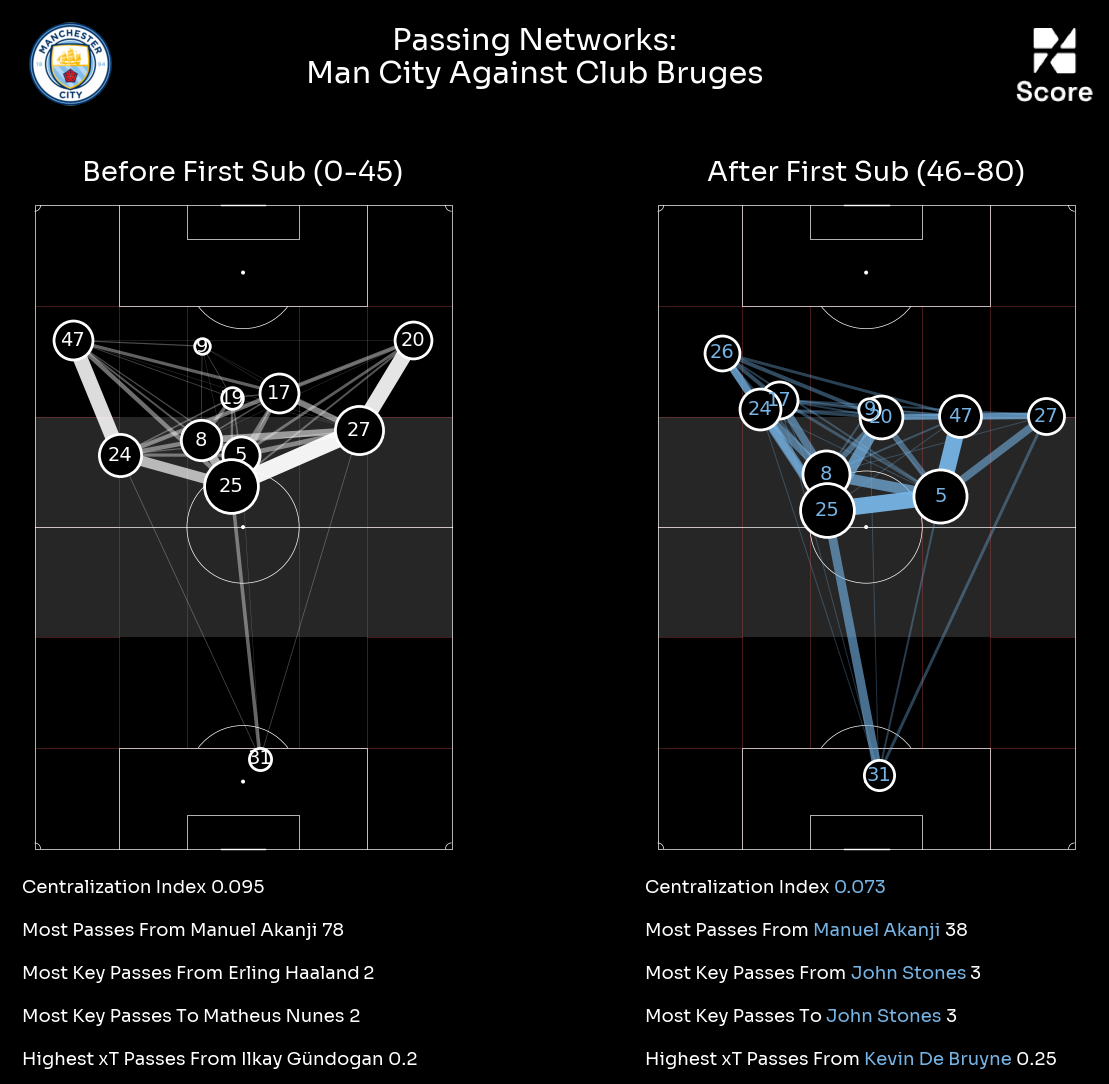

In [118]:
fig,axs=plt.subplots(1,2, figsize=(16,9), facecolor=background)

plt.subplots_adjust(wspace=0.01)

fig.suptitle(f'Passing Networks:\n{team1_name} Against {team2_name}', fontsize=22,fontproperties=font_prop, color='white', y=1.05)

img_team1 = mpimg.imread(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/TeamLogos/{team1_name}.png')
ax_image = add_image(
    img_team1, fig, left=0.15, bottom=0.95, width=0.12, height=0.12,aspect='equal'
)

logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')
ax_image = add_image(
    logo, fig, left=0.78, bottom=0.96, width=0.09, height=0.09,aspect='equal'
)

pass_network_stats_home = pass_network_visualization(axs[0], home_passes_between_df_1st_half, home_avg_locs_1st_half, team1_facecolor, team1_name,12)
pass_network_stats_away = pass_network_visualization(axs[1], home_passes_between_df_2nd_half, home_avg_locs_2nd_half, team2_facecolor, team1_name,12)
#action_types = ['Passes', 'Acc Passes', 'Long Ball','Crosses', 'Penalty Box']
#plot_donut_charts(axs[1],action_types,passing_stats(team1_name,df),passing_stats(team2_name,df),team1_name,team2_name)
plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/PassingNetworks.png',dpi=500,bbox_inches = 'tight',facecolor=background)


## xG Per Game State

### When Losing/Drawing

In [201]:
query = """WITH ShotGameState AS (
    SELECT 
        s.*,
        CASE 
            WHEN h_a = 'h' AND h_goals > a_goals THEN 'winning'
            WHEN h_a = 'h' AND h_goals = a_goals THEN 'drawing'
            WHEN h_a = 'h' AND h_goals < a_goals THEN 'losing'
            WHEN h_a = 'a' AND a_goals > h_goals THEN 'winning'
            WHEN h_a = 'a' AND a_goals = h_goals THEN 'drawing'
            WHEN h_a = 'a' AND a_goals < h_goals THEN 'losing'
        END AS game_state,
        CASE WHEN h_a = 'h' THEN h_team ELSE a_team END AS team
    FROM understat_shots_tb s
    WHERE season = '2024' and league = 'EPL'
), 

StateChange AS (
    SELECT 
        team, 
        league,
        match_id,
        minute,
        game_state,
        result,
        "xG",
        (CASE WHEN result = 'goal' THEN 1 ELSE 0 END) AS goal,
        LAG(game_state) OVER (PARTITION BY team, match_id ORDER BY minute) AS prev_game_state
    FROM ShotGameState
),

FilteredShots AS (
    SELECT 
        team, 
        league,
        match_id,
        SUM(CASE WHEN game_state IN ('losing') THEN "xG" ELSE 0 END) AS total_xG,
        SUM(CASE WHEN game_state IN ('losing') AND result = 'Goal' THEN 1 ELSE 0 END) AS total_goals
    FROM StateChange
    WHERE game_state IN ('losing')
    GROUP BY team, league, match_id
),

AggregatedTeams AS (
    SELECT 
        team,
        league,
        SUM(total_xG) AS total_xG,
        SUM(total_goals) AS total_goals
    FROM FilteredShots
    GROUP BY team, league
),

RankedTeams AS (
    SELECT 
        team,
        league,
        total_xG,
        total_goals,
        RANK() OVER (ORDER BY total_xG DESC) AS rank
    FROM AggregatedTeams
)

SELECT team, total_xG, total_goals
FROM RankedTeams;"""

with engine.connect() as conn:
    df1 = pd.read_sql(query, conn)

In [202]:
df1['xG_Losing'] = df1['total_xg']
df1['Goals_Losing'] = df1['total_goals']

df1.drop(columns = ['total_xg','total_goals'],inplace=True)


In [203]:
query = """WITH ShotGameState AS (
    SELECT 
        s.*,
        CASE 
            WHEN h_a = 'h' AND h_goals > a_goals THEN 'winning'
            WHEN h_a = 'h' AND h_goals = a_goals THEN 'drawing'
            WHEN h_a = 'h' AND h_goals < a_goals THEN 'losing'
            WHEN h_a = 'a' AND a_goals > h_goals THEN 'winning'
            WHEN h_a = 'a' AND a_goals = h_goals THEN 'drawing'
            WHEN h_a = 'a' AND a_goals < h_goals THEN 'losing'
        END AS game_state,
        CASE WHEN h_a = 'h' THEN h_team ELSE a_team END AS team
    FROM understat_shots_tb s
    WHERE season = '2024' and league = 'EPL'
), 

StateChange AS (
    SELECT 
        team, 
        league,
        match_id,
        minute,
        game_state,
        result,
        "xG",
        (CASE WHEN result = 'goal' THEN 1 ELSE 0 END) AS goal,
        LAG(game_state) OVER (PARTITION BY team, match_id ORDER BY minute) AS prev_game_state
    FROM ShotGameState
),

FilteredShots AS (
    SELECT 
        team, 
        league,
        match_id,
        SUM(CASE WHEN game_state = 'winning' THEN "xG" ELSE 0 END) AS total_xG,
        SUM(CASE WHEN game_state = 'winning' AND result = 'Goal' THEN 1 ELSE 0 END) AS total_goals
    FROM StateChange
    WHERE game_state = 'winning'
    GROUP BY team, league, match_id
),

AggregatedTeams AS (
    SELECT 
        team,
        league,
        SUM(total_xG) AS total_xG,
        SUM(total_goals) AS total_goals
    FROM FilteredShots
    GROUP BY team, league
),

RankedTeams AS (
    SELECT 
        team,
        league,
        total_xG,
        total_goals,
        RANK() OVER (ORDER BY total_xG DESC) AS rank
    FROM AggregatedTeams
)

SELECT team, total_xG, total_goals
FROM RankedTeams;"""

with engine.connect() as conn:
    df2 = pd.read_sql(query, conn)

In [204]:
df2['xG_Winning'] = df2['total_xg']
df2['Goals_Winning'] = df2['total_goals']

df2.drop(columns = ['total_xg','total_goals'],inplace=True)

In [205]:
query = """WITH ShotGameState AS (
    SELECT 
        s.*,
        CASE 
            WHEN h_a = 'h' AND h_goals > a_goals THEN 'winning'
            WHEN h_a = 'h' AND h_goals = a_goals THEN 'drawing'
            WHEN h_a = 'h' AND h_goals < a_goals THEN 'losing'
            WHEN h_a = 'a' AND a_goals > h_goals THEN 'winning'
            WHEN h_a = 'a' AND a_goals = h_goals THEN 'drawing'
            WHEN h_a = 'a' AND a_goals < h_goals THEN 'losing'
        END AS game_state,
        CASE WHEN h_a = 'h' THEN h_team ELSE a_team END AS team
    FROM understat_shots_tb s
    WHERE season = '2024' and league = 'EPL'
), 

StateChange AS (
    SELECT 
        team, 
        league,
        match_id,
        minute,
        game_state,
        result,
        "xG",
        (CASE WHEN result = 'goal' THEN 1 ELSE 0 END) AS goal,
        LAG(game_state) OVER (PARTITION BY team, match_id ORDER BY minute) AS prev_game_state
    FROM ShotGameState
),

FilteredShots AS (
    SELECT 
        team, 
        league,
        match_id,
        SUM(CASE WHEN game_state = 'drawing' THEN "xG" ELSE 0 END) AS total_xG,
        SUM(CASE WHEN game_state = 'drawing' AND result = 'Goal' THEN 1 ELSE 0 END) AS total_goals
    FROM StateChange
    WHERE game_state = 'drawing'
    GROUP BY team, league, match_id
),

AggregatedTeams AS (
    SELECT 
        team,
        league,
        SUM(total_xG) AS total_xG,
        SUM(total_goals) AS total_goals
    FROM FilteredShots
    GROUP BY team, league
),

RankedTeams AS (
    SELECT 
        team,
        league,
        total_xG,
        total_goals,
        RANK() OVER (ORDER BY total_xG DESC) AS rank
    FROM AggregatedTeams
)

SELECT team, total_xG, total_goals
FROM RankedTeams;"""

with engine.connect() as conn:
    df3 = pd.read_sql(query, conn)

In [206]:
df3['xG_Drawing'] = df3['total_xg']
df3['Goals_Drawing'] = df3['total_goals']

df3.drop(columns = ['total_xg','total_goals'],inplace=True)

In [207]:
df12 = df1.merge(df2, on='team', how='inner') 
df = df12.merge(df3, on='team', how='inner')

In [208]:
df['xG_Losing'] = round(df['xG_Losing'],2)
df['xG_Winning'] = round(df['xG_Winning'],2)
df['xG_Drawing'] = round(df['xG_Drawing'],2)

In [209]:
df.loc[19, "team"] = "Wolves"

In [215]:
df['Goals_Losing'] = df['Goals_Losing'].astype(int)
df['Goals_Winning'] = df['Goals_Winning'].astype(int)
df['Goals_Drawing'] = df['Goals_Drawing'].astype(int)

In [216]:
df.head()

team  xG_Losing  Goals_Losing  xG_Winning  Goals_Winning  \
0      Arsenal       1.75             0       36.63             39   
1  Aston Villa       7.77             2       23.29             21   
2  Bournemouth      11.04             3       32.21             33   
3    Brentford      10.78             7       28.72             32   
4     Brighton       6.05             4       17.13             21   

   xG_Drawing  Goals_Drawing  
0       14.25             10  
1       13.62             11  
2       10.91              8  
3        5.07              3  
4       15.57             12

In [217]:
# Define local logo folder path
logo_dir = r"C:/Users/acer/Desktop/IndianCityzen/football-logos-master/logos/England - Premier League/"

# Create `image_url` column dynamically
df["image_url"] = df["team"].apply(lambda team: os.path.join(logo_dir, f"{team}.png"))

In [218]:
# Calculate total goals for sorting
df["Total_Goals"] = df["Goals_Losing"] + df["Goals_Drawing"] + df["Goals_Winning"]

# Sort teams by total goals in descending order
df = df.sort_values(by="Total_Goals", ascending=False)

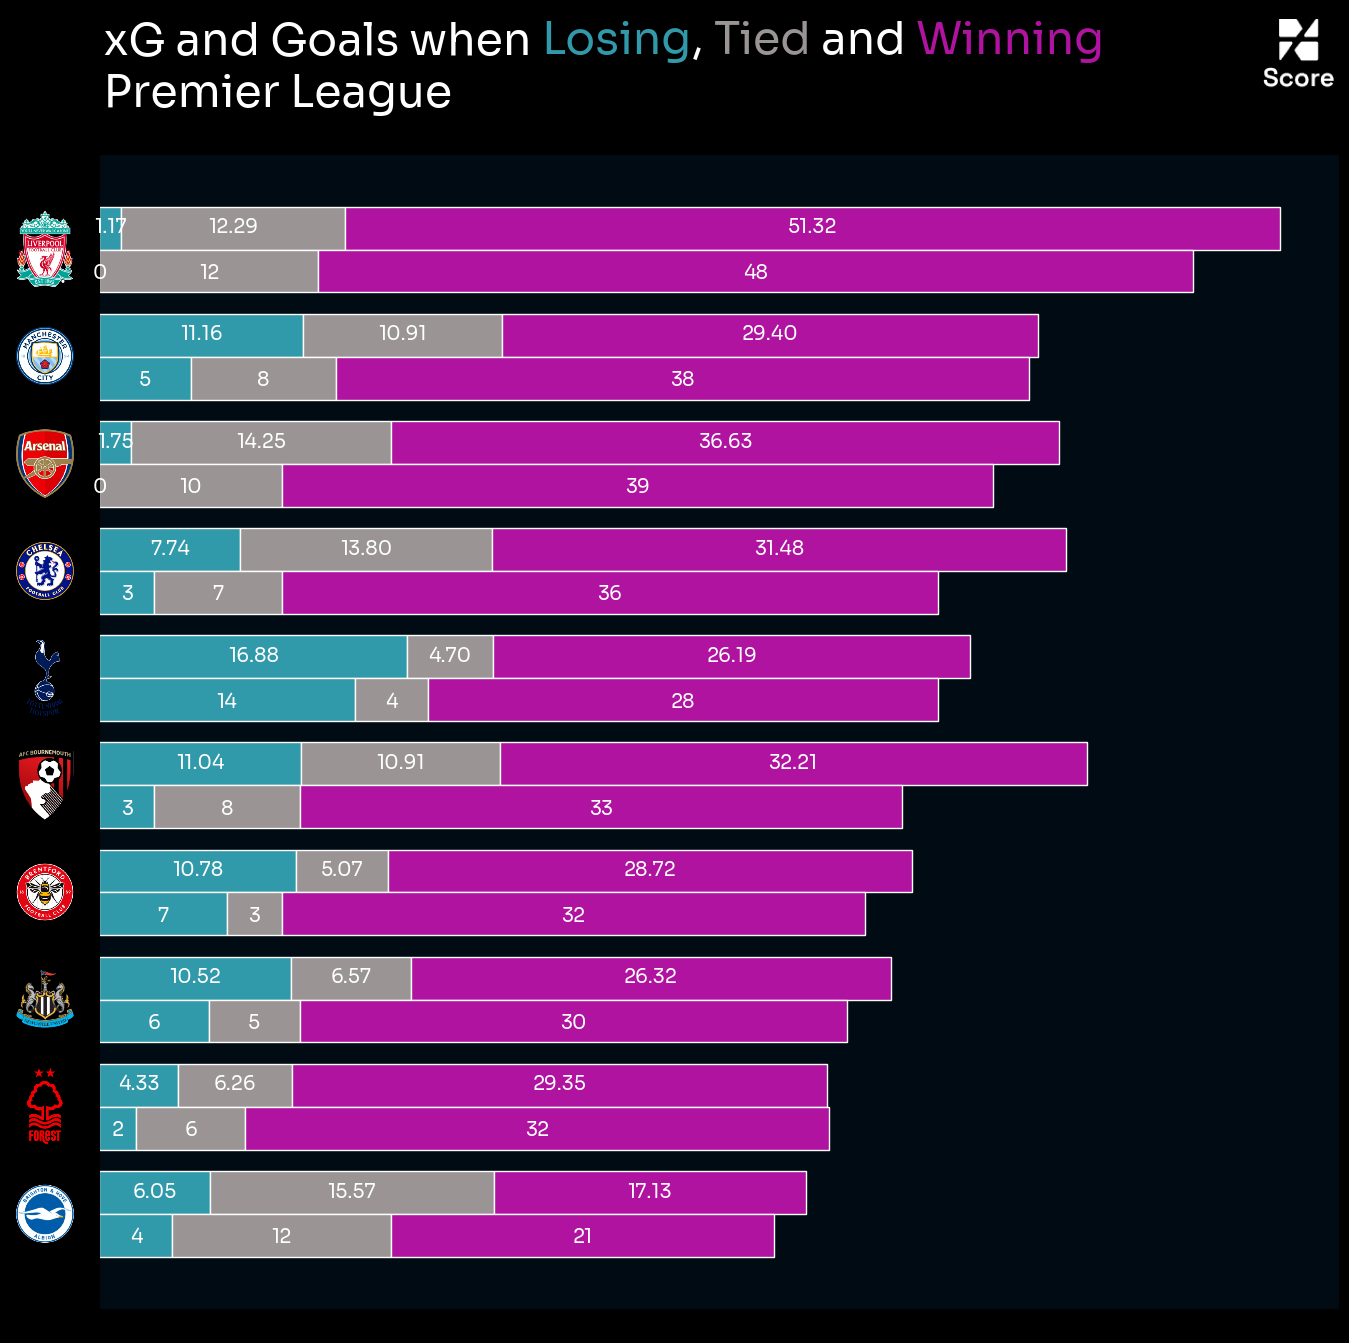

In [219]:
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

df_top10 = df[:10]

# Set up figure and axes
fig, ax = plt.subplots(figsize=(16, 15),facecolor=background)
background = "#010b14"
text_color = 'white'
ax.set_facecolor(background)

# Number of teams
num_teams = len(df_top10)
y_positions = np.arange(num_teams)
bar_height = 0.4  # Height of each stacked bar

# Stacked Bars for xG
ax.barh(y_positions - bar_height / 2, df_top10["xG_Losing"], height=bar_height, color="#319AAA",edgecolor='white', label="xG (Losing)")
ax.barh(y_positions - bar_height / 2, df_top10["xG_Drawing"], height=bar_height, color="#9a9594",edgecolor='white', left=df_top10["xG_Losing"], label="xG (Drawing)")
ax.barh(y_positions - bar_height / 2, df_top10["xG_Winning"], height=bar_height, color="#af13a0", edgecolor='white',left=df_top10["xG_Losing"] + df_top10["xG_Drawing"], label="xG (Winning)")

# Stacked Bars for Goals
ax.barh(y_positions + bar_height / 2, df_top10["Goals_Losing"], height=bar_height, color="#319AAA",edgecolor='white', label="Goals (Losing)")
ax.barh(y_positions + bar_height / 2, df_top10["Goals_Drawing"], height=bar_height, color="#9a9594",edgecolor='white', left=df_top10["Goals_Losing"], label="Goals (Drawing)")
ax.barh(y_positions + bar_height / 2, df_top10["Goals_Winning"], height=bar_height, color="#af13a0",edgecolor='white', left=df_top10["Goals_Losing"] + df_top10["Goals_Drawing"], label="Goals (Winning)")


# Add text labels for xG values
for i, team in enumerate(df_top10["team"]):
    # xG values
    ax.text(df_top10["xG_Losing"].iloc[i] / 2, y_positions[i] - bar_height / 2.5, 
            f'{df_top10["xG_Losing"].iloc[i]:.2f}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    ax.text(df_top10["xG_Losing"].iloc[i] + df_top10["xG_Drawing"].iloc[i] / 2, y_positions[i] - bar_height / 2.5, 
            f'{df_top10["xG_Drawing"].iloc[i]:.2f}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    ax.text(df_top10["xG_Losing"].iloc[i] + df_top10["xG_Drawing"].iloc[i] + df_top10["xG_Winning"].iloc[i] / 2, 
            y_positions[i] - bar_height / 2.5, f'{df_top10["xG_Winning"].iloc[i]:.2f}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    # Goal values
    ax.text(df_top10["Goals_Losing"].iloc[i] / 2, y_positions[i] + bar_height / 1.5, 
            f'{df_top10["Goals_Losing"].iloc[i]}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    ax.text(df_top10["Goals_Losing"].iloc[i] + df_top10["Goals_Drawing"].iloc[i] / 2, y_positions[i] + bar_height / 1.5, 
            f'{df_top10["Goals_Drawing"].iloc[i]}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    ax.text(df_top10["Goals_Losing"].iloc[i] + df_top10["Goals_Drawing"].iloc[i] + df_top10["Goals_Winning"].iloc[i] / 2, 
            y_positions[i] + bar_height / 1.5, f'{df_top10["Goals_Winning"].iloc[i]}', color='white', ha='center',fontproperties=font_prop, fontsize=14)


for y, img_path in zip(y_positions, df_top10["image_url"]):
    if os.path.exists(img_path):  # Check if the image file exists
        img = mpimg.imread(img_path)  # Load the image
        imagebox = OffsetImage(img, zoom=0.3)  # Adjust zoom level
        ab = AnnotationBbox(imagebox, (0.8, y), frameon=False, xybox=(-50, 0), xycoords='data', boxcoords="offset points")
        ax.add_artist(ab)



logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

ax_image = add_image(
    logo, fig, left=0.85, bottom=0.92, width=0.05, height=0.05,aspect='equal'
)
# Labels and Titles
#ax.set_yticks(y_positions)
#ax.set_yticklabels(df_top10["team"],fontproperties=font_prop, color='white', fontsize=20)
#ax.set_xlabel("xG and Goals per 90")
#ax.set_title("xG vs Goals in Different Game States", fontweight="bold",fontproperties=font_prop, color='white', fontsize=30)


ax_text(-2, -1.5, '''
    xG and Goals when <Losing>, <Tied> and <Winning>\n
    Premier League
    ''',
    color='white',fontproperties=font_prop,
    highlight_textprops=[{'color':'#319AAA'}, {'color':'#9a9594'},{'color':'#af13a0'}], fontsize=32, ha='left', va='center', ax=ax)

# Grid and Legend
#ax.grid(axis="x", linestyle="--", alpha=0.7)
#ax.legend(loc="lower right", ncol=2)

ax.invert_yaxis()

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/GameState_Top10.png',dpi=500,bbox_inches = 'tight',facecolor=background)


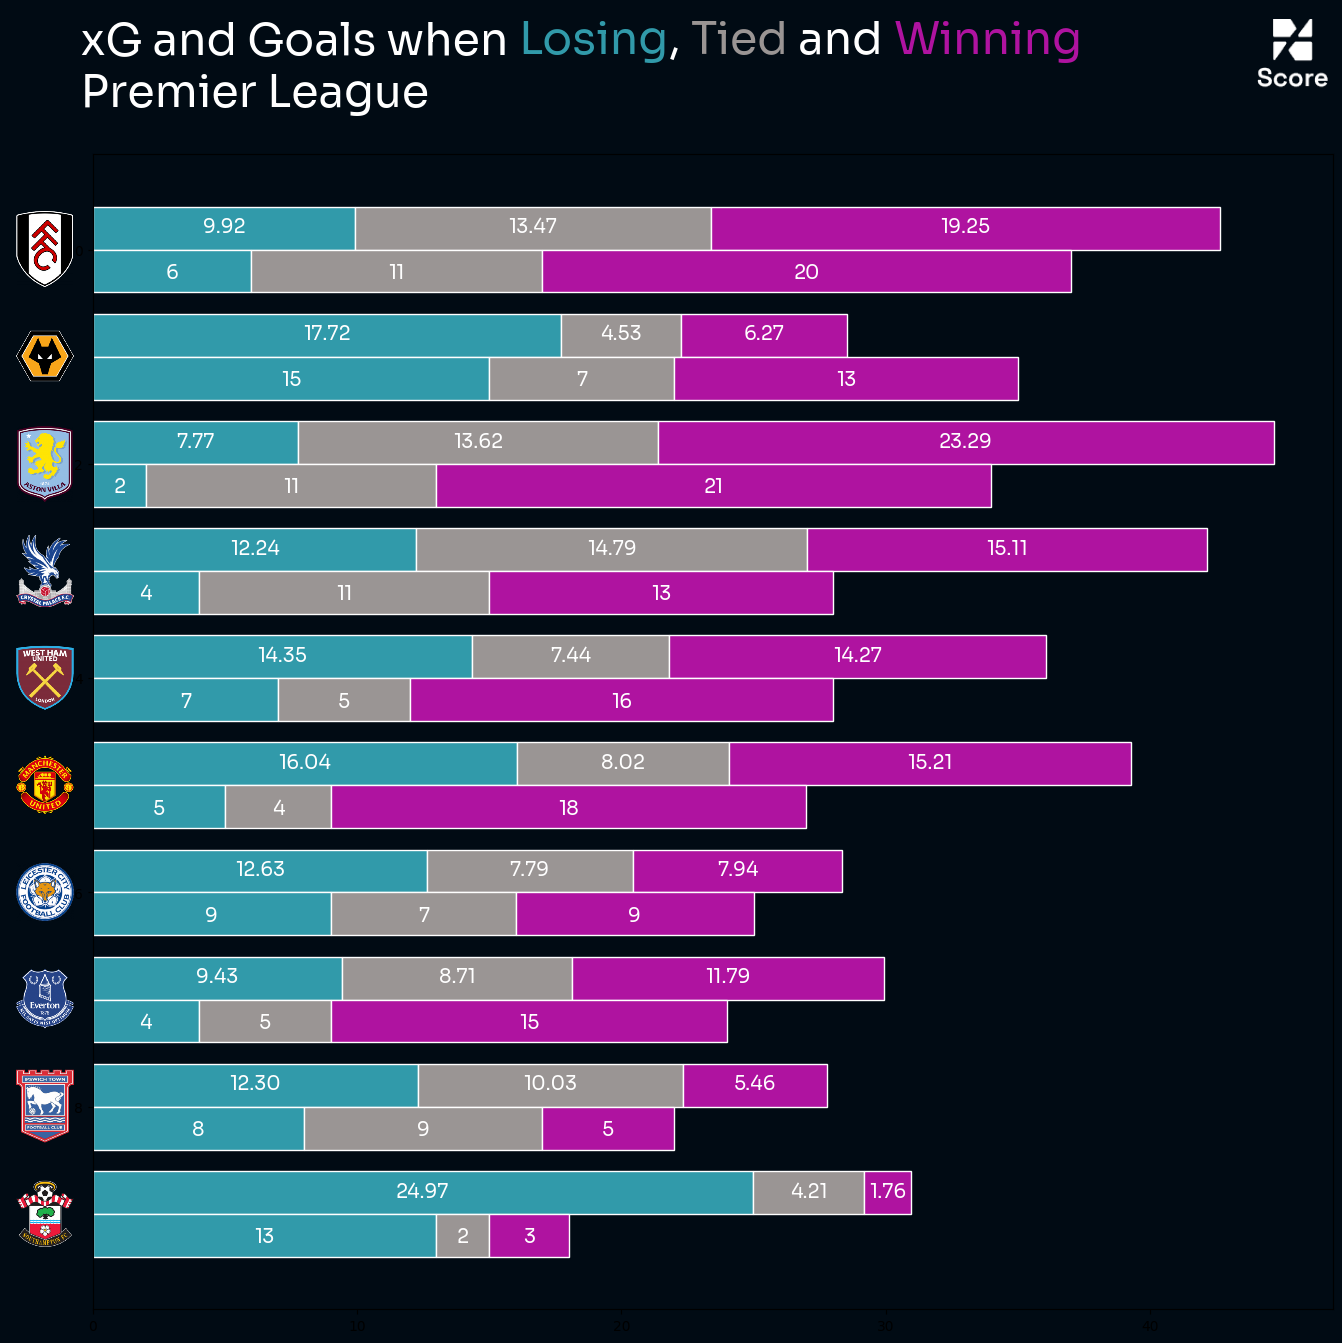

In [220]:
df_top10 = df[10:]

# Set up figure and axes
fig, ax = plt.subplots(figsize=(16, 15),facecolor=background)
background = "#010b14"
text_color = 'white'
ax.set_facecolor(background)

# Number of teams
num_teams = len(df_top10)
y_positions = np.arange(num_teams)
bar_height = 0.4  # Height of each stacked bar

# Stacked Bars for xG
ax.barh(y_positions - bar_height / 2, df_top10["xG_Losing"], height=bar_height, color="#319AAA",edgecolor='white', label="xG (Losing)")
ax.barh(y_positions - bar_height / 2, df_top10["xG_Drawing"], height=bar_height, color="#9a9594",edgecolor='white', left=df_top10["xG_Losing"], label="xG (Drawing)")
ax.barh(y_positions - bar_height / 2, df_top10["xG_Winning"], height=bar_height, color="#af13a0", edgecolor='white',left=df_top10["xG_Losing"] + df_top10["xG_Drawing"], label="xG (Winning)")

# Stacked Bars for Goals
ax.barh(y_positions + bar_height / 2, df_top10["Goals_Losing"], height=bar_height, color="#319AAA",edgecolor='white', label="Goals (Losing)")
ax.barh(y_positions + bar_height / 2, df_top10["Goals_Drawing"], height=bar_height, color="#9a9594",edgecolor='white', left=df_top10["Goals_Losing"], label="Goals (Drawing)")
ax.barh(y_positions + bar_height / 2, df_top10["Goals_Winning"], height=bar_height, color="#af13a0",edgecolor='white', left=df_top10["Goals_Losing"] + df_top10["Goals_Drawing"], label="Goals (Winning)")


# Add text labels for xG values
for i, team in enumerate(df_top10["team"]):
    # xG values
    ax.text(df_top10["xG_Losing"].iloc[i] / 2, y_positions[i] - bar_height / 2.5, 
            f'{df_top10["xG_Losing"].iloc[i]:.2f}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    ax.text(df_top10["xG_Losing"].iloc[i] + df_top10["xG_Drawing"].iloc[i] / 2, y_positions[i] - bar_height / 2.5, 
            f'{df_top10["xG_Drawing"].iloc[i]:.2f}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    ax.text(df_top10["xG_Losing"].iloc[i] + df_top10["xG_Drawing"].iloc[i] + df_top10["xG_Winning"].iloc[i] / 2, 
            y_positions[i] - bar_height / 2.5, f'{df_top10["xG_Winning"].iloc[i]:.2f}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    # Goal values
    ax.text(df_top10["Goals_Losing"].iloc[i] / 2, y_positions[i] + bar_height / 1.5, 
            f'{df_top10["Goals_Losing"].iloc[i]}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    ax.text(df_top10["Goals_Losing"].iloc[i] + df_top10["Goals_Drawing"].iloc[i] / 2, y_positions[i] + bar_height / 1.5, 
            f'{df_top10["Goals_Drawing"].iloc[i]}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    ax.text(df_top10["Goals_Losing"].iloc[i] + df_top10["Goals_Drawing"].iloc[i] + df_top10["Goals_Winning"].iloc[i] / 2, 
            y_positions[i] + bar_height / 1.5, f'{df_top10["Goals_Winning"].iloc[i]}', color='white', ha='center',fontproperties=font_prop, fontsize=14)



for y, img_path in zip(y_positions, df_top10["image_url"]):
    if os.path.exists(img_path):  # Check if the image file exists
        img = mpimg.imread(img_path)  # Load the image
        imagebox = OffsetImage(img, zoom=0.3)  # Adjust zoom level
        ab = AnnotationBbox(imagebox, (0.8, y), frameon=False, xybox=(-50, 0), xycoords='data', boxcoords="offset points")
        ax.add_artist(ab)



logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

ax_image = add_image(
    logo, fig, left=0.85, bottom=0.92, width=0.05, height=0.05,aspect='equal'
)
# Labels and Titles
#ax.set_yticks(y_positions)
#ax.set_yticklabels(df_top10["team"],fontproperties=font_prop, color='white', fontsize=20)
#ax.set_xlabel("xG and Goals per 90")
#ax.set_title("xG vs Goals in Different Game States", fontweight="bold",fontproperties=font_prop, color='white', fontsize=30)


ax_text(-2, -1.5, '''
    xG and Goals when <Losing>, <Tied> and <Winning>\n
    Premier League
    ''',
    color='white',fontproperties=font_prop,
    highlight_textprops=[{'color':'#319AAA'}, {'color':'#9a9594'},{'color':'#af13a0'}], fontsize=32, ha='left', va='center', ax=ax)

# Grid and Legend
#ax.grid(axis="x", linestyle="--", alpha=0.7)
#ax.legend(loc="lower right", ncol=2)

ax.invert_yaxis()

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/GameState_Bottom10.png',dpi=500,bbox_inches = 'tight',facecolor=background)


## xG and Goals Conceded For Diff Game States

In [242]:
query = """WITH ShotGameState AS (
    SELECT 
        s.*,
        CASE 
            WHEN h_a = 'h' AND h_goals > a_goals THEN 'winning'
            WHEN h_a = 'h' AND h_goals = a_goals THEN 'drawing'
            WHEN h_a = 'h' AND h_goals < a_goals THEN 'losing'
            WHEN h_a = 'a' AND a_goals > h_goals THEN 'winning'
            WHEN h_a = 'a' AND a_goals = h_goals THEN 'drawing'
            WHEN h_a = 'a' AND a_goals < h_goals THEN 'losing'
        END AS game_state,
        -- Identify the conceding team
        CASE WHEN h_a = 'h' THEN a_team ELSE h_team END AS team
    FROM understat_shots_tb s
    WHERE season = '2024' AND league = 'EPL'
), 

StateChange AS (
    SELECT 
        team, 
        league,
        match_id,
        minute,
        game_state,
        result,
        "xG",
        (CASE WHEN result = 'goal' THEN 1 ELSE 0 END) AS goal
    FROM ShotGameState
),

FilteredShots AS (
    SELECT 
        team, 
        league,
        match_id,
        game_state,
        SUM("xG") AS total_xG_conceded,
        SUM(CASE WHEN result = 'Goal' THEN 1 ELSE 0 END) AS total_goals_conceded
    FROM StateChange
    GROUP BY team, league, match_id, game_state
),

AggregatedTeams AS (
    SELECT 
        team,
        league,
        SUM(CASE WHEN game_state = 'losing' THEN total_xG_conceded ELSE 0 END) AS xg_conceded_losing,
        SUM(CASE WHEN game_state = 'losing' THEN total_goals_conceded ELSE 0 END) AS goals_conceded_losing,
        SUM(CASE WHEN game_state = 'drawing' THEN total_xG_conceded ELSE 0 END) AS xg_conceded_drawing,
        SUM(CASE WHEN game_state = 'drawing' THEN total_goals_conceded ELSE 0 END) AS goals_conceded_drawing,
        SUM(CASE WHEN game_state = 'winning' THEN total_xG_conceded ELSE 0 END) AS xg_conceded_winning,
        SUM(CASE WHEN game_state = 'winning' THEN total_goals_conceded ELSE 0 END) AS goals_conceded_winning
    FROM FilteredShots
    GROUP BY team, league
),

TotalXGConceded AS (
    SELECT 
        team,
        (xg_conceded_losing + xg_conceded_drawing + xg_conceded_winning) AS overall_xG_conceded
    FROM AggregatedTeams
)

SELECT 
    a.team, 
    a.xg_conceded_losing, a.goals_conceded_losing,
    a.xg_conceded_drawing, a.goals_conceded_drawing,
    a.xg_conceded_winning, a.goals_conceded_winning
FROM AggregatedTeams a
JOIN TotalXGConceded t ON a.team = t.team
ORDER BY t.overall_xG_conceded DESC;

"""

with engine.connect() as conn:
    df = pd.read_sql(query, conn)

In [243]:
df.columns

Index(['team', 'xg_conceded_losing', 'goals_conceded_losing',
       'xg_conceded_drawing', 'goals_conceded_drawing', 'xg_conceded_winning',
       'goals_conceded_winning'],
      dtype='object')

In [244]:
df['xg_conceded_losing'] = round(df['xg_conceded_losing'],2)
df['xg_conceded_drawing'] = round(df['xg_conceded_drawing'],2)
df['xg_conceded_winning'] = round(df['xg_conceded_winning'],2)

df['goals_conceded_losing'] = df['goals_conceded_losing'].astype(int)
df['goals_conceded_drawing'] = df['goals_conceded_drawing'].astype(int)
df['goals_conceded_winning'] = df['goals_conceded_winning'].astype(int)

In [248]:
df.loc[6, "team"]  = "Wolves"

In [249]:
# Define local logo folder path
logo_dir = r"C:/Users/acer/Desktop/IndianCityzen/football-logos-master/logos/England - Premier League/"

# Create `image_url` column dynamically
df["image_url"] = df["team"].apply(lambda team: os.path.join(logo_dir, f"{team}.png"))

In [254]:
df.columns

Index(['team', 'xg_conceded_losing', 'goals_conceded_losing',
       'xg_conceded_drawing', 'goals_conceded_drawing', 'xg_conceded_winning',
       'goals_conceded_winning', 'image_url'],
      dtype='object')

In [265]:
df_top10 = df[:10]

# Set up figure and axes
fig, ax = plt.subplots(figsize=(16, 15),facecolor=background)
background = "#010b14"
text_color = 'white'
ax.set_facecolor(background)

# Number of teams
num_teams = len(df_top10)
y_positions = np.arange(num_teams)
bar_height = 0.4  # Height of each stacked bar

# Stacked Bars for xG
ax.barh(y_positions - bar_height / 2, df_top10["xg_conceded_losing"], height=bar_height, color="#319AAA",edgecolor='white', label="xG (Losing)")
ax.barh(y_positions - bar_height / 2, df_top10["xg_conceded_drawing"], height=bar_height, color="#9a9594",edgecolor='white', left=df_top10["xg_conceded_losing"], label="xG (Drawing)")
ax.barh(y_positions - bar_height / 2, df_top10["xg_conceded_winning"], height=bar_height, color="#af13a0", edgecolor='white',left=df_top10["xg_conceded_losing"] + df_top10["xg_conceded_drawing"], label="xG (Winning)")

# Stacked Bars for Goals
ax.barh(y_positions + bar_height / 2, df_top10["goals_conceded_losing"], height=bar_height, color="#319AAA",edgecolor='white', label="Goals (Losing)")
ax.barh(y_positions + bar_height / 2, df_top10["goals_conceded_drawing"], height=bar_height, color="#9a9594",edgecolor='white', left=df_top10["goals_conceded_losing"], label="Goals (Drawing)")
ax.barh(y_positions + bar_height / 2, df_top10["goals_conceded_winning"], height=bar_height, color="#af13a0",edgecolor='white', left=df_top10["goals_conceded_losing"] + df_top10["goals_conceded_drawing"], label="Goals (Winning)")


# Add text labels for xG values
for i, team in enumerate(df_top10["team"]):
    # xG values
    ax.text(df_top10["xg_conceded_losing"].iloc[i] / 2, y_positions[i] - bar_height / 2.5, 
            f'{df_top10["xg_conceded_losing"].iloc[i]:.2f}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    ax.text(df_top10["xg_conceded_losing"].iloc[i] + df_top10["xg_conceded_drawing"].iloc[i] / 2, y_positions[i] - bar_height / 2.5, 
            f'{df_top10["xg_conceded_drawing"].iloc[i]:.2f}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    ax.text(df_top10["xg_conceded_losing"].iloc[i] + df_top10["xg_conceded_drawing"].iloc[i] + df_top10["xg_conceded_winning"].iloc[i] / 2, 
            y_positions[i] - bar_height / 2.5, f'{df_top10["xg_conceded_winning"].iloc[i]:.2f}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    # Goal values
    ax.text(df_top10["goals_conceded_losing"].iloc[i] / 2, y_positions[i] + bar_height / 1.5, 
            f'{df_top10["goals_conceded_losing"].iloc[i]}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    ax.text(df_top10["goals_conceded_losing"].iloc[i] + df_top10["goals_conceded_drawing"].iloc[i] / 2, y_positions[i] + bar_height / 1.5, 
            f'{df_top10["goals_conceded_drawing"].iloc[i]}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    ax.text(df_top10["goals_conceded_losing"].iloc[i] + df_top10["goals_conceded_drawing"].iloc[i] + df_top10["goals_conceded_winning"].iloc[i] / 2, 
            y_positions[i] + bar_height / 1.5, f'{df_top10["goals_conceded_winning"].iloc[i]}', color='white', ha='center',fontproperties=font_prop, fontsize=14)



for y, img_path in zip(y_positions, df_top10["image_url"]):
    if os.path.exists(img_path):  # Check if the image file exists
        img = mpimg.imread(img_path)  # Load the image
        imagebox = OffsetImage(img, zoom=0.3)  # Adjust zoom level
        ab = AnnotationBbox(imagebox, (0.8, y), frameon=False, xybox=(-50, 0), xycoords='data', boxcoords="offset points")
        ax.add_artist(ab)



logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

ax_image = add_image(
    logo, fig, left=0.85, bottom=0.92, width=0.05, height=0.05,aspect='equal'
)
# Labels and Titles
#ax.set_yticks(y_positions)
#ax.set_yticklabels(df_top10["team"],fontproperties=font_prop, color='white', fontsize=20)
#ax.set_xlabel("xG and Goals per 90")
#ax.set_title("xG vs Goals in Different Game States", fontweight="bold",fontproperties=font_prop, color='white', fontsize=30)


ax_text(-4, -1.5, '''
    xG and Goals Conceded when <Losing>, <Tied> and <Winning>\n
    Premier League
    ''',
    color='white',fontproperties=font_prop,
    highlight_textprops=[{'color':'#319AAA'}, {'color':'#9a9594'},{'color':'#af13a0'}], fontsize=30, ha='left', va='center', ax=ax)

# Grid and Legend
#ax.grid(axis="x", linestyle="--", alpha=0.7)
#ax.legend(loc="lower right", ncol=2)

ax.invert_yaxis()

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/Conceded_GameState_Top10.png',dpi=500,bbox_inches = 'tight',facecolor=background)


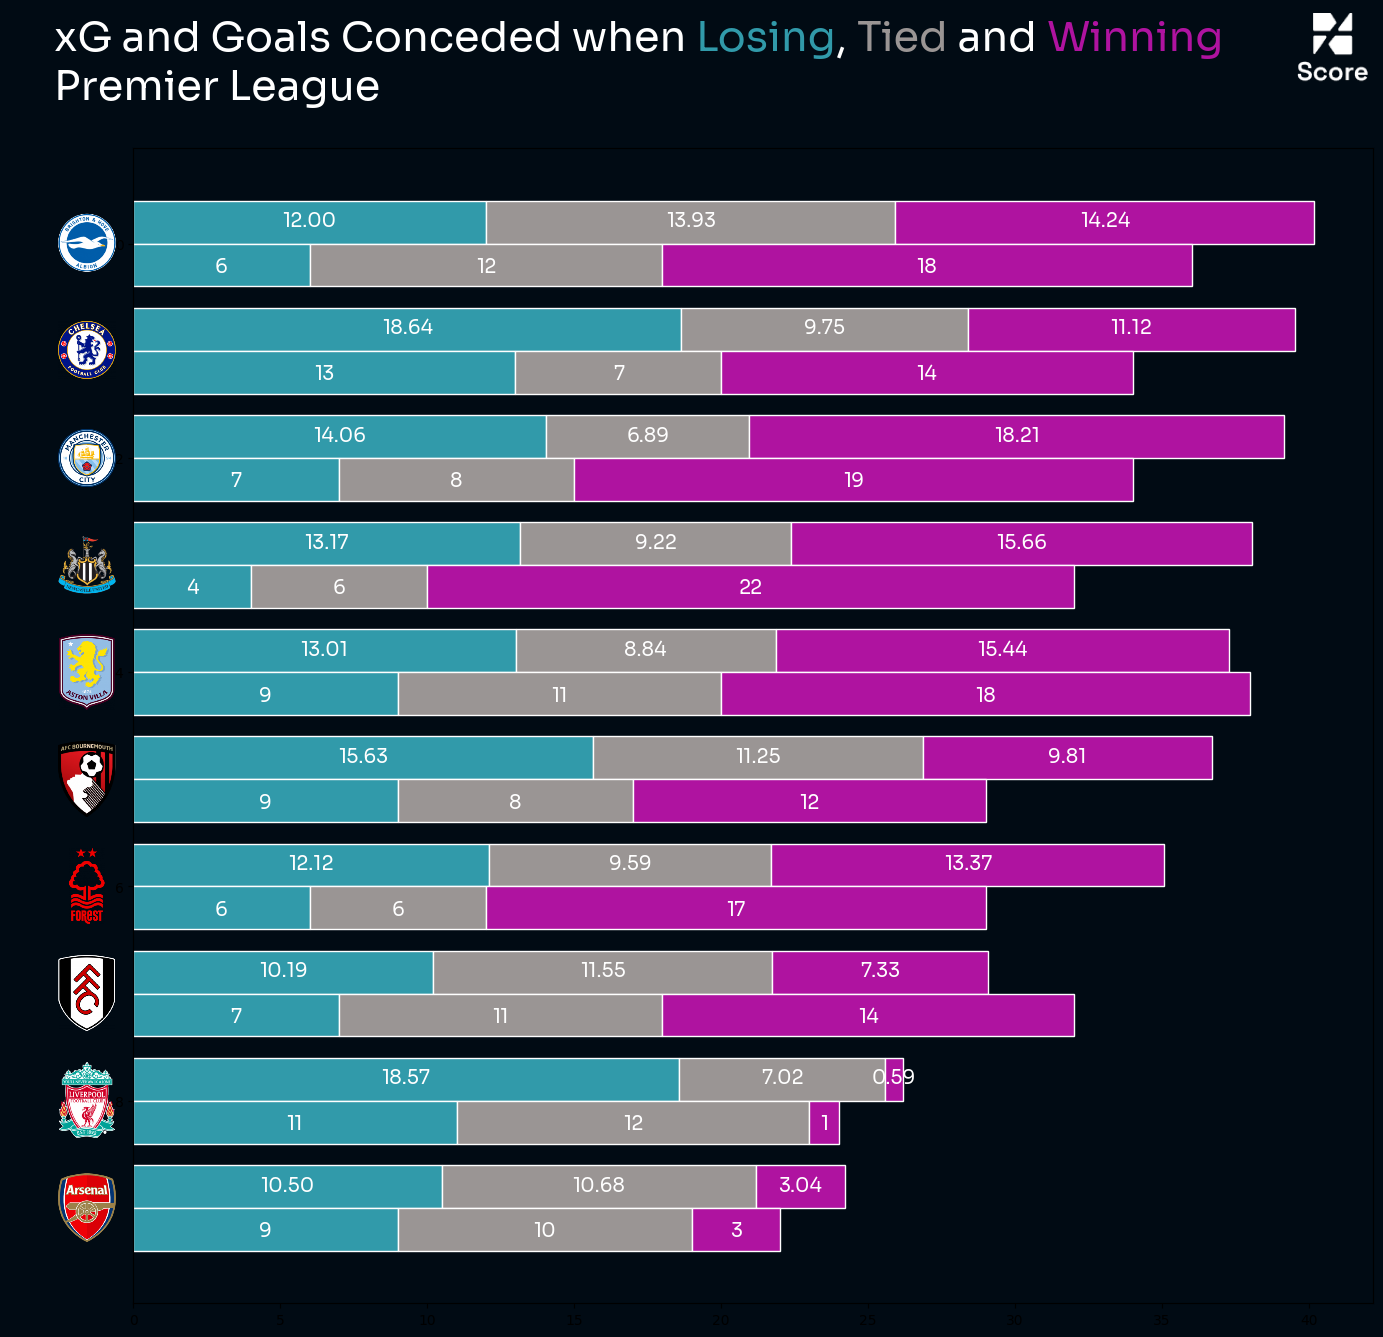

In [267]:
df_top10 = df[10:]

# Set up figure and axes
fig, ax = plt.subplots(figsize=(16, 15),facecolor=background)
background = "#010b14"
text_color = 'white'
ax.set_facecolor(background)

# Number of teams
num_teams = len(df_top10)
y_positions = np.arange(num_teams)
bar_height = 0.4  # Height of each stacked bar

# Stacked Bars for xG
ax.barh(y_positions - bar_height / 2, df_top10["xg_conceded_losing"], height=bar_height, color="#319AAA",edgecolor='white', label="xG (Losing)")
ax.barh(y_positions - bar_height / 2, df_top10["xg_conceded_drawing"], height=bar_height, color="#9a9594",edgecolor='white', left=df_top10["xg_conceded_losing"], label="xG (Drawing)")
ax.barh(y_positions - bar_height / 2, df_top10["xg_conceded_winning"], height=bar_height, color="#af13a0", edgecolor='white',left=df_top10["xg_conceded_losing"] + df_top10["xg_conceded_drawing"], label="xG (Winning)")

# Stacked Bars for Goals
ax.barh(y_positions + bar_height / 2, df_top10["goals_conceded_losing"], height=bar_height, color="#319AAA",edgecolor='white', label="Goals (Losing)")
ax.barh(y_positions + bar_height / 2, df_top10["goals_conceded_drawing"], height=bar_height, color="#9a9594",edgecolor='white', left=df_top10["goals_conceded_losing"], label="Goals (Drawing)")
ax.barh(y_positions + bar_height / 2, df_top10["goals_conceded_winning"], height=bar_height, color="#af13a0",edgecolor='white', left=df_top10["goals_conceded_losing"] + df_top10["goals_conceded_drawing"], label="Goals (Winning)")


# Add text labels for xG values
for i, team in enumerate(df_top10["team"]):
    # xG values
    ax.text(df_top10["xg_conceded_losing"].iloc[i] / 2, y_positions[i] - bar_height / 2.5, 
            f'{df_top10["xg_conceded_losing"].iloc[i]:.2f}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    ax.text(df_top10["xg_conceded_losing"].iloc[i] + df_top10["xg_conceded_drawing"].iloc[i] / 2, y_positions[i] - bar_height / 2.5, 
            f'{df_top10["xg_conceded_drawing"].iloc[i]:.2f}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    ax.text(df_top10["xg_conceded_losing"].iloc[i] + df_top10["xg_conceded_drawing"].iloc[i] + df_top10["xg_conceded_winning"].iloc[i] / 2, 
            y_positions[i] - bar_height / 2.5, f'{df_top10["xg_conceded_winning"].iloc[i]:.2f}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    # Goal values
    ax.text(df_top10["goals_conceded_losing"].iloc[i] / 2, y_positions[i] + bar_height / 1.5, 
            f'{df_top10["goals_conceded_losing"].iloc[i]}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    ax.text(df_top10["goals_conceded_losing"].iloc[i] + df_top10["goals_conceded_drawing"].iloc[i] / 2, y_positions[i] + bar_height / 1.5, 
            f'{df_top10["goals_conceded_drawing"].iloc[i]}', color='white', ha='center',fontproperties=font_prop, fontsize=14)
    
    ax.text(df_top10["goals_conceded_losing"].iloc[i] + df_top10["goals_conceded_drawing"].iloc[i] + df_top10["goals_conceded_winning"].iloc[i] / 2, 
            y_positions[i] + bar_height / 1.5, f'{df_top10["goals_conceded_winning"].iloc[i]}', color='white', ha='center',fontproperties=font_prop, fontsize=14)



for y, img_path in zip(y_positions, df_top10["image_url"]):
    if os.path.exists(img_path):  # Check if the image file exists
        img = mpimg.imread(img_path)  # Load the image
        imagebox = OffsetImage(img, zoom=0.3)  # Adjust zoom level
        ab = AnnotationBbox(imagebox, (0.8, y), frameon=False, xybox=(-50, 0), xycoords='data', boxcoords="offset points")
        ax.add_artist(ab)



logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

ax_image = add_image(
    logo, fig, left=0.85, bottom=0.92, width=0.05, height=0.05,aspect='equal'
)
# Labels and Titles
#ax.set_yticks(y_positions)
#ax.set_yticklabels(df_top10["team"],fontproperties=font_prop, color='white', fontsize=20)
#ax.set_xlabel("xG and Goals per 90")
#ax.set_title("xG vs Goals in Different Game States", fontweight="bold",fontproperties=font_prop, color='white', fontsize=30)


ax_text(-4, -1.5, '''
    xG and Goals Conceded when <Losing>, <Tied> and <Winning>\n
    Premier League
    ''',
    color='white',fontproperties=font_prop,
    highlight_textprops=[{'color':'#319AAA'}, {'color':'#9a9594'},{'color':'#af13a0'}], fontsize=30, ha='left', va='center', ax=ax)

# Grid and Legend
#ax.grid(axis="x", linestyle="--", alpha=0.7)
#ax.legend(loc="lower right", ncol=2)

ax.invert_yaxis()

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/Conceded_GameState_Bottom10.png',dpi=500,bbox_inches = 'tight',facecolor=background)


## Passing V Carrying

In [38]:
df = pd.read_csv('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Data/PassingVPossession/final_stats_La-Liga-Stats.csv')

In [39]:
df.head()

player team_x  \
0               Alex Baena     VI   
1            Gerard Moreno     VI   
2              Ayoze Pérez     VI   
3  Iñigo Ruiz de Galarreta     AT   
4               Iago Aspas     CE   

                                          url_x  pass_metric      id_x  \
0               /en/players/518f2234/Alex-Baena         3.07  518f2234   
1            /en/players/81f0781e/Gerard-Moreno         3.01  81f0781e   
2              /en/players/819aa8e7/Ayoze-Perez         2.61  819aa8e7   
3  /en/players/91f7631f/Inigo-Ruiz-de-Galarreta         2.60  91f7631f   
4               /en/players/7dcf86f6/Iago-Aspas         2.59  7dcf86f6   

                                        headshot_url team_y  \
0  https://fbref.com/req/202302030/images/headsho...     VI   
1  https://fbref.com/req/202302030/images/headsho...     VI   
2  https://fbref.com/req/202302030/images/headsho...     VI   
3  https://fbref.com/req/202302030/images/headsho...     AT   
4  https://fbref.com/req/202302030/images/headsho...     CE   

                                          url_y  carry_metric      id_y  
0               /en/players/518f2234/Alex-Baena          1.01  518f2234  
1            /en/players/81f0781e/Gerard-Moreno          0.08  81f0781e  
2              /en/players/819aa8e7/Ayoze-Perez          2.36  819aa8e7  
3  /en/players/91f7631f/Inigo-Ruiz-de-Galarreta         -0.17  91f7631f  
4               /en/players/7dcf86f6/Iago-Aspas          0.52  7dcf86f6

In [65]:
df1 = df.drop_duplicates(subset=['player'])

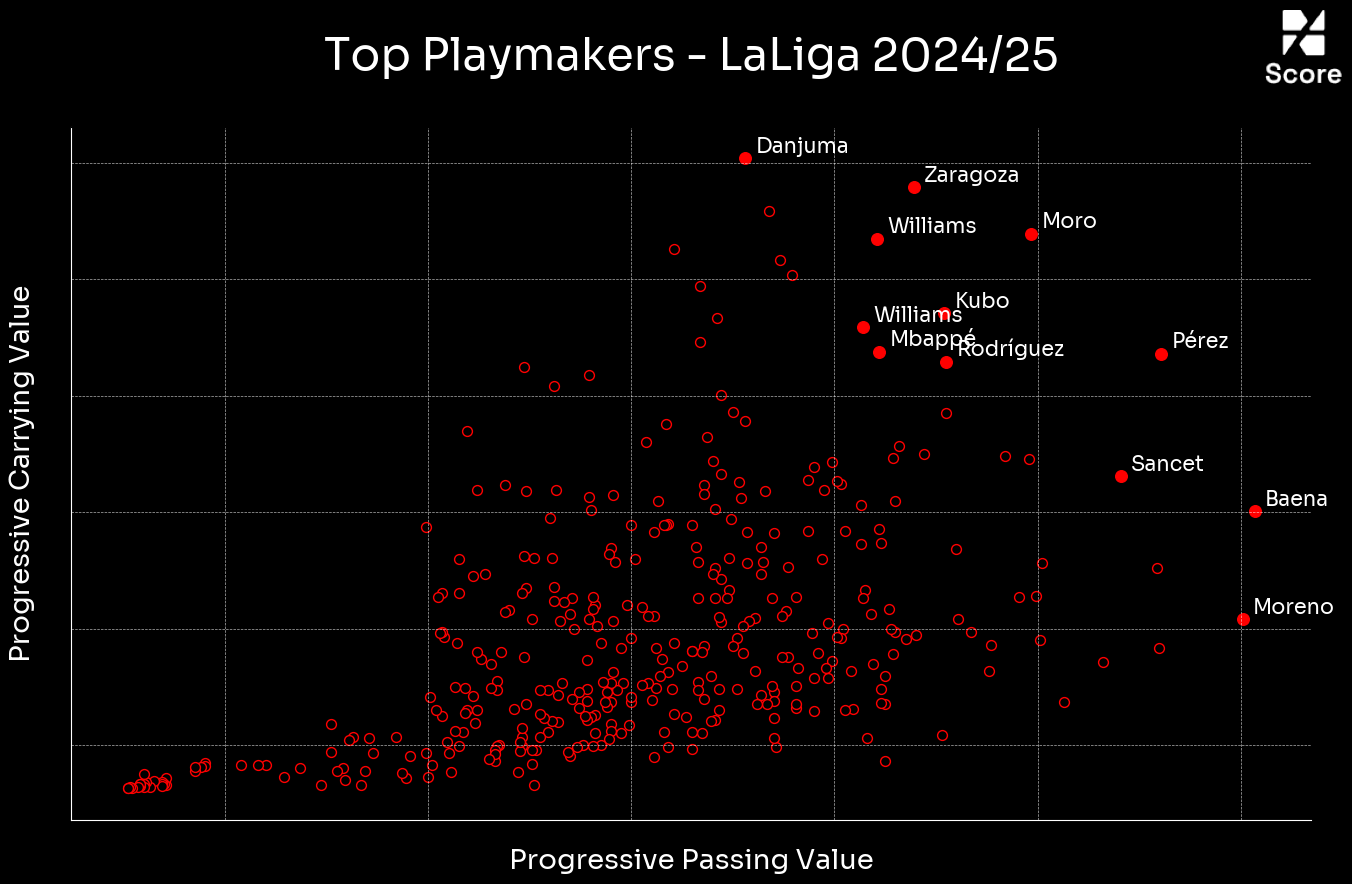

In [83]:
fig, ax = plt.subplots(figsize=(16,9))
fig.set_facecolor(background)
ax.set_facecolor(background)
ax.grid(color='white', linestyle='--', linewidth=0.5, alpha=0.7)

for index,row in df1.iterrows():
  if ((row['pass_metric'] >= 2.0) & (row['carry_metric'] >= 1.0)) or (row['pass_metric'] >= 1.0) & (row['carry_metric'] >= 2.0) or (row['pass_metric'] >= 3.0) or (row['carry_metric'] >= 4.0):
    ax.scatter(row['pass_metric'], row['carry_metric'],color='red',s=70)
    ax.annotate(row['player'].split(' ')[-1],xy = (row['pass_metric']+0.05,row['carry_metric']+0.05),fontproperties=font_prop,color='white',fontsize=15)
  else:
    ax.scatter(row['pass_metric'], row['carry_metric'],color=background,edgecolor='red',s=50)


logo = mpimg.imread('C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Score Logos-20241022T100701Z-001/Score Logos/ScoreSquareWhite.png')

ax_image = add_image(
    logo, fig, left=0.85, bottom=0.92, width=0.09, height=0.09,aspect='equal'
)

#ax.tick_params(axis='x', colors='white')
#ax.tick_params(axis='y', colors='white')
#ax.spines['top'].set_color('white')
#ax.spines['right'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

ax.set_xlabel("Progressive Passing Value",fontproperties=font_prop,color='white',fontsize=20)
ax.set_ylabel("Progressive Carrying Value",fontproperties=font_prop,color='white',fontsize=20)
ax.set_title("Top Playmakers - LaLiga 2024/25",fontproperties=font_prop,color='white',fontsize=32,y=1.07)
#ax.suptitle("Players With 100+ Passes and Carries",fontsize=18,color='white')
#fig.text(0.5, 0, "Data from FBRef | Ishdeep Chahda | @indian_citizen", ha='center', fontsize=10,color='white')

plt.savefig(f'C:/Users/acer/Documents/GitHub/IndianCitizen/ScorePredict/Images/Plots/Playmakers_LaLiga.png',dpi=500,bbox_inches = 'tight',facecolor=background)
